<a href="https://colab.research.google.com/github/JosenildoJunior/Fraud_prediction/blob/main/CreditCard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Previsões de fraudes**

##*Esse projeto visa identificar transações fraudulentas.*

Para a resolução dessa problemática o projeto foi dividido nas seguintes etapas:

* 1.   *Entendimento do problema*
* 2.   *Obtenção dos dados*
* 3.   *Analise exploratória e Visualização dos dados*
* 4.   *Pré-Processamento*
* 5.   *Modelos de Machine Learning e Avaliação do modelo*






# **1. Entendimento do problema**

Uma empresa de cartão de crédito deseja conseguir reconhecer transações fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não compraram. Sabendo disso, o nosso dever é desenvolver um modelo de Machine Learning que consiga afirmar quais transações são normais e quais são fraudulentas.

# **2. Obtenção dos dados**


**Permitindo o acesso do Google Colab ao Drive**

  Esse passo é necessário para que seja possivel importar dados diretamente do drive

In [1]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importando as bibliotecas**

**Para fazer as analises é necessario importar algumas bibliotecas previamente, nesse caso estou importando o pandas para manipulação de dados, também estão sendo importadas o pyplot e o seaborn para visualização dos dados.**

In [2]:
# Manipulação de dados
import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

**Importação dos dados**

In [3]:
#Fonte: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
df = pd.read_csv('/content/drive/MyDrive/Dados/creditcard.csv')

# Visualizando as primeiras linhas
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

*No conjunto de dados temos as seguintes variáveis*

* Time : Número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados
* As variáveis V1 até V28 não são detalhadas para proteger as identidades dos usuários.
* Amount : Valor da transação
* Class : 1 para transações fraudulentas, 0 caso contrário.


# **3. Analise exploratória dos dados**





**Objetivos**: 

* Identificar o tipo de cada variável (numérica, categórica, temporal)
* Identificar qual é a variável target (alvo) para o nosso problema
* Exploração dos dados (medidas descritivas, distribuição das variáveis)
* Visualizar os dados para identificar padrões de fraudes

*Com esse conjunto de dados em específico a análise exploratória dos dados está comprometida, pois a maioria dos dados passou por uma redução da dimensionalidade do PCA para proteger identidades de usuários e recursos.*

In [4]:
# Visão geral dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Observando as dimensões do DataFrame
df.shape

(284807, 31)

É possível observar que esse dataset tem 284807 entradas e 31 colunas.

Os dados se enquadram em duas categorias:

* **Variáveis numéricas: V1 até V28, Amount e Class.**

* **Variáveis temporais: Time.**

**Identificando a variável alvo:**

O objetivo é identificar transações fraudulentas. Assim, a variável **'Class   '** é a variável adequada para alcançar os objetivos propostos.

*Como esse dataset apresenta um número grande de colunas algumas colunas não serão exibidas, então para que isso não aconteça sera necessário utilizar a função set_option*

In [6]:
# Exibindo todas as colunas do DF
pd.set_option('display.max_columns', 50)
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [7]:
# Observando os dados 
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

*Na variavel 'Amount' a maioria dos dados estão concentrados entre 1 e 77,16  tendo como media 88,34 e o valor máximo é 25691.*

*Observando as variáveis numéricas*

In [8]:
# Instalando e importando o SweetViz
!pip install sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)


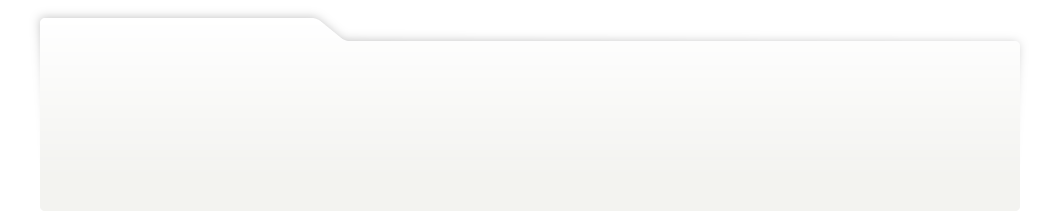
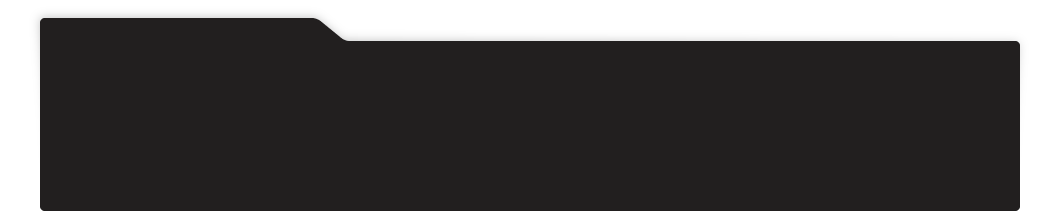
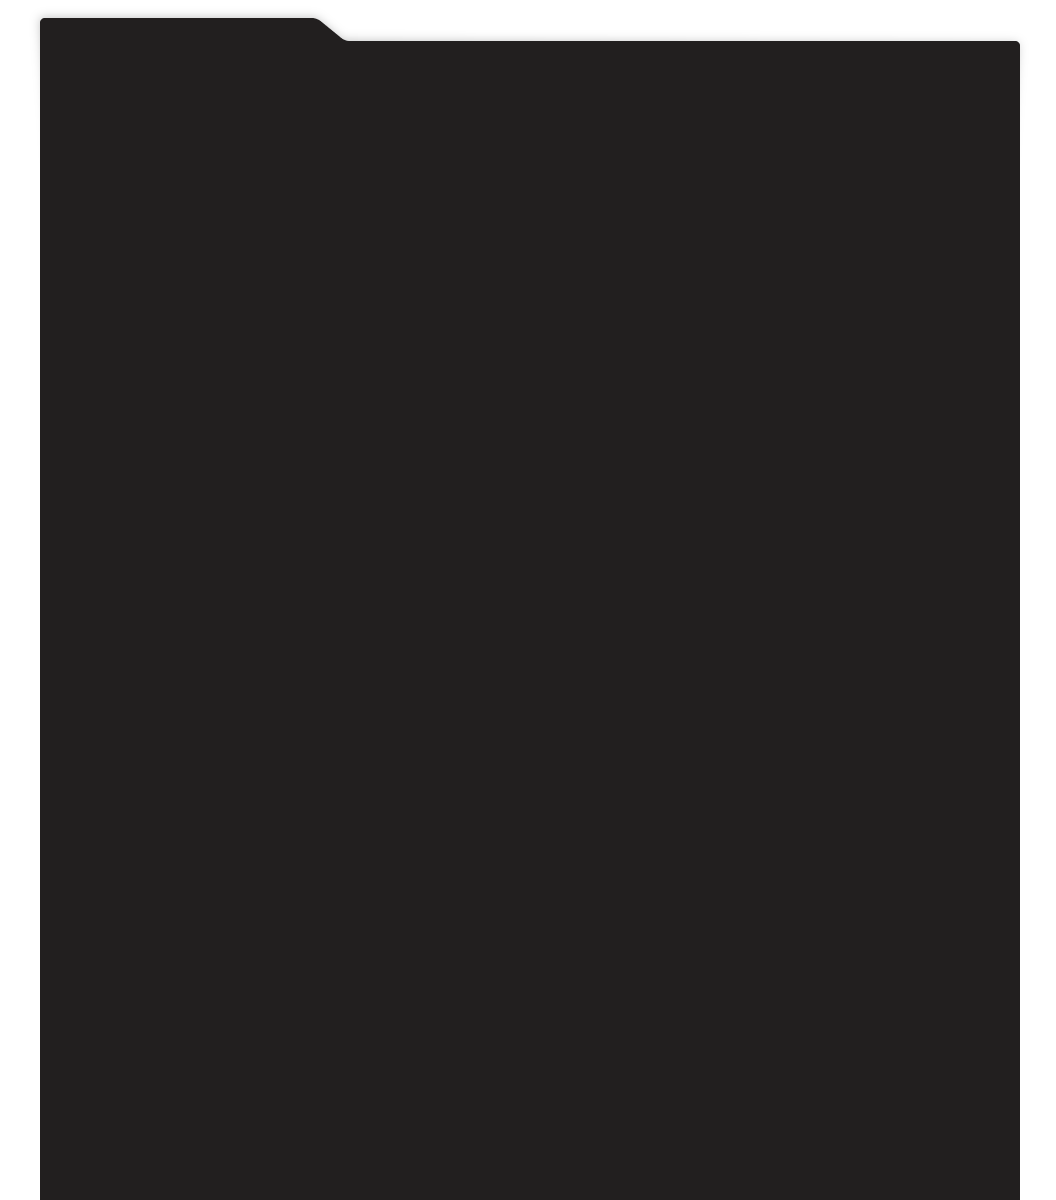
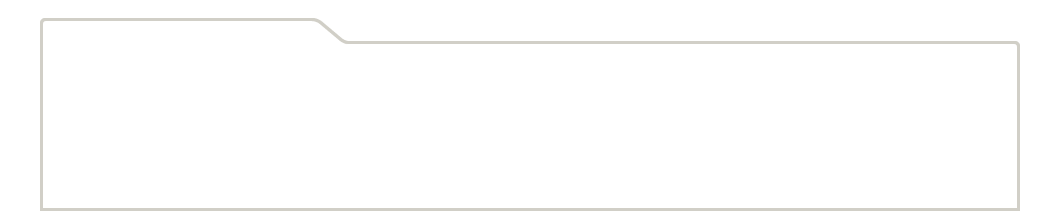
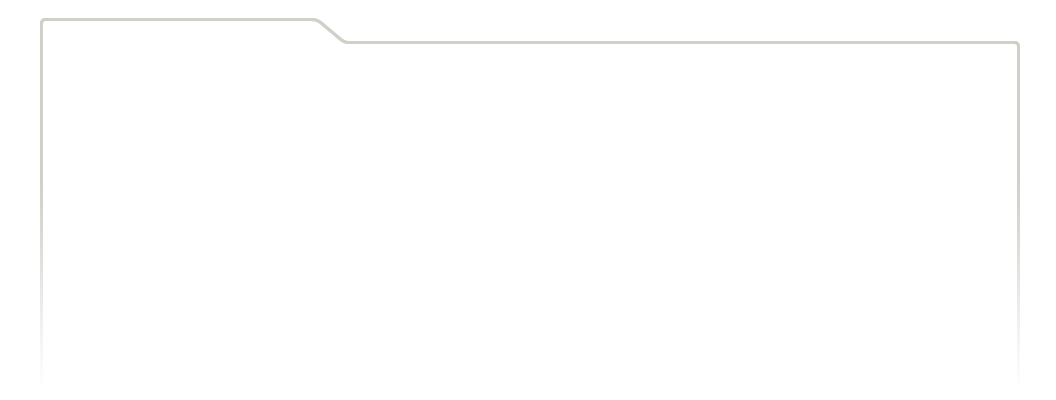
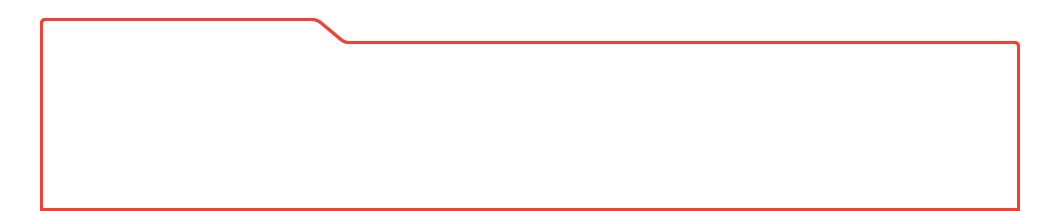
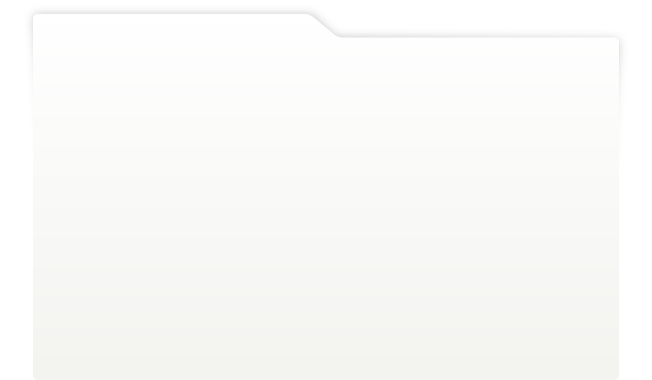
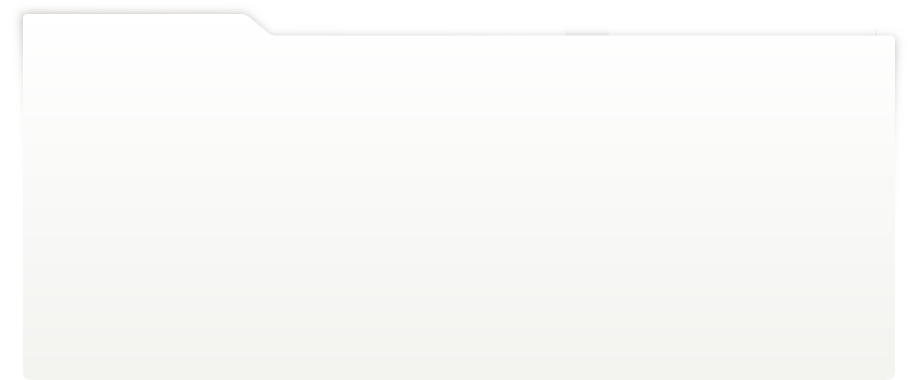
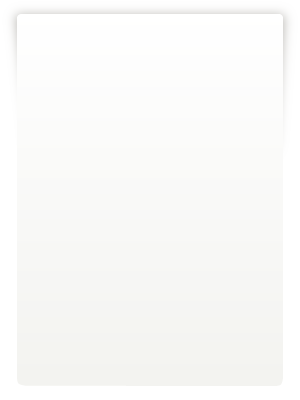
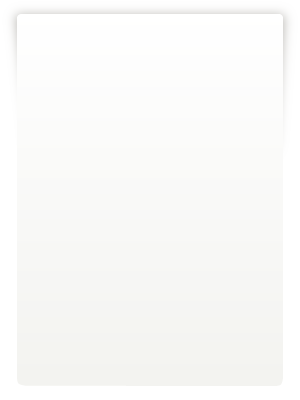
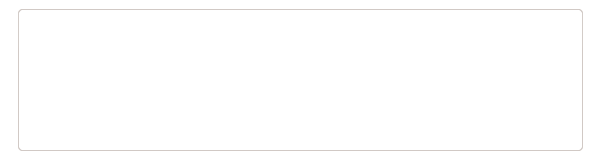
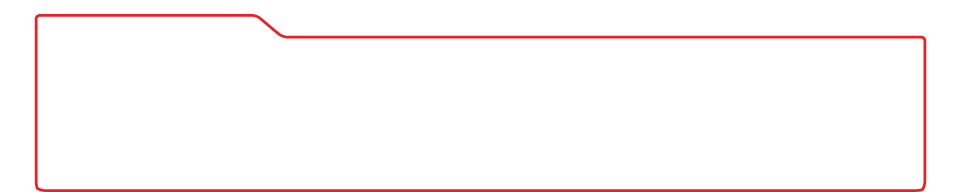
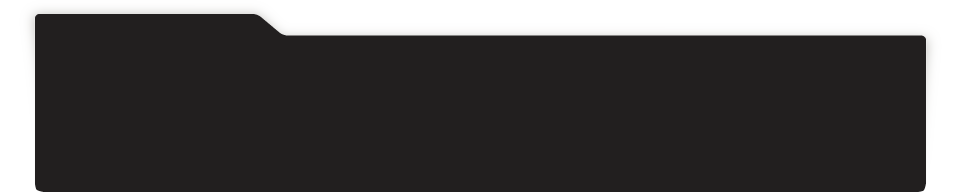
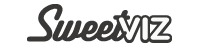
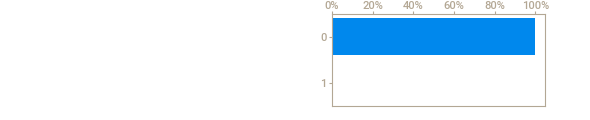
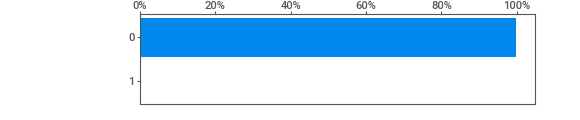
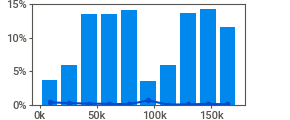
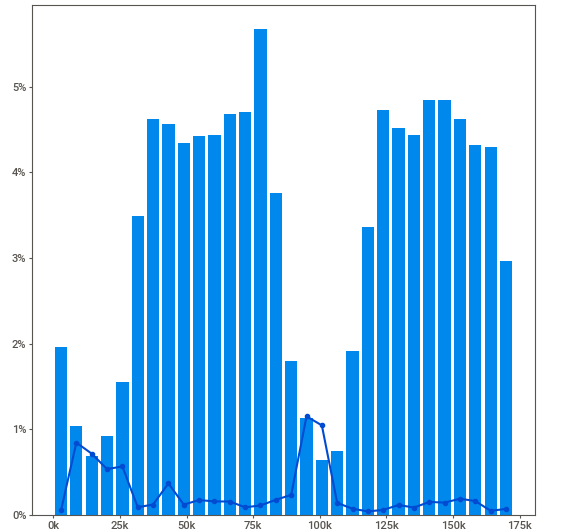
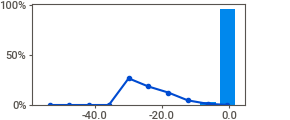
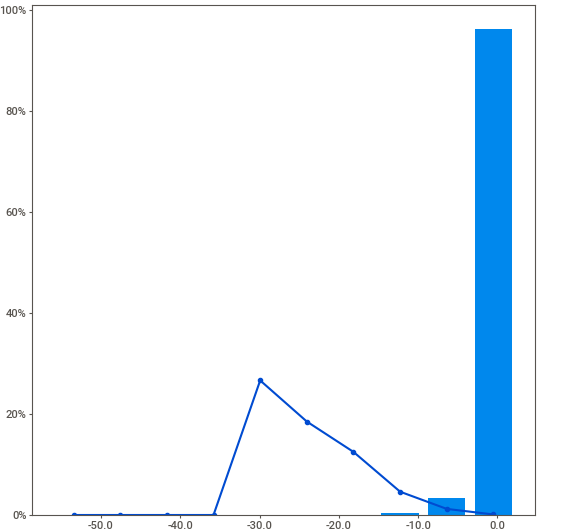
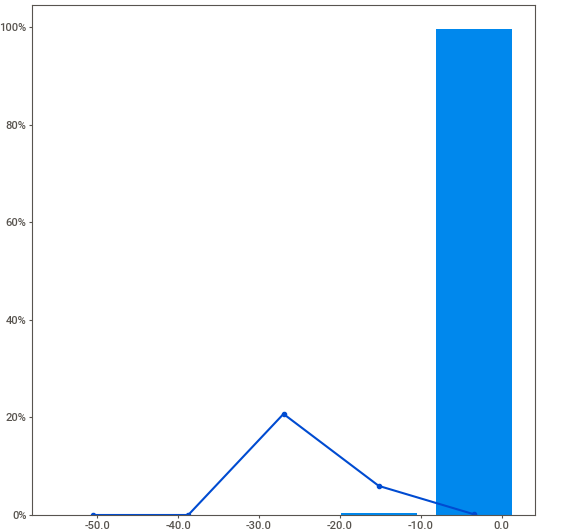
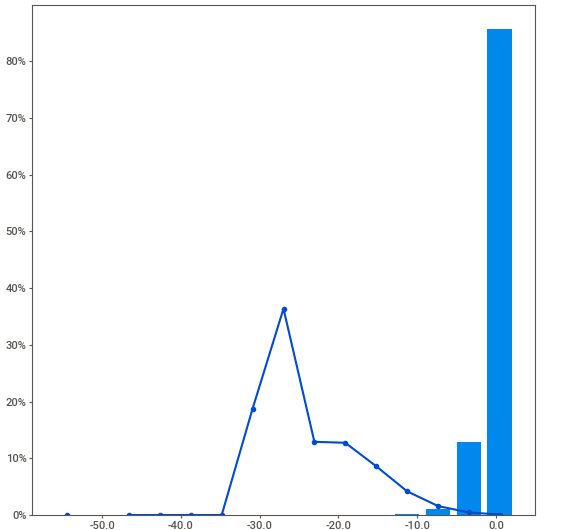
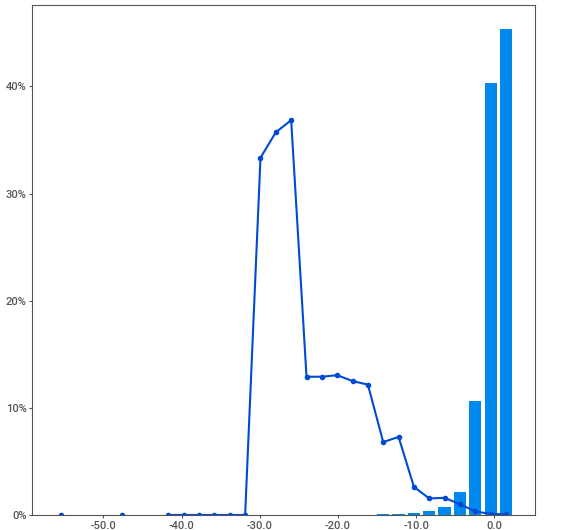
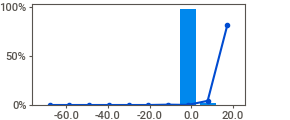
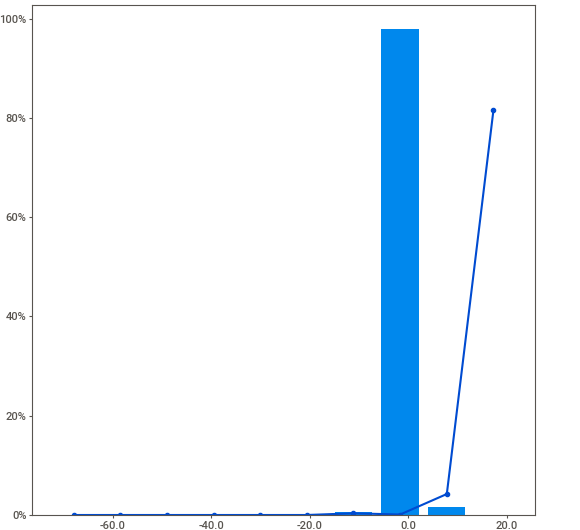
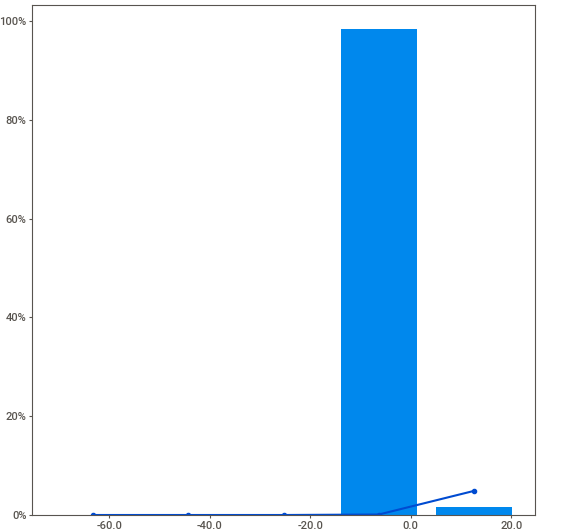
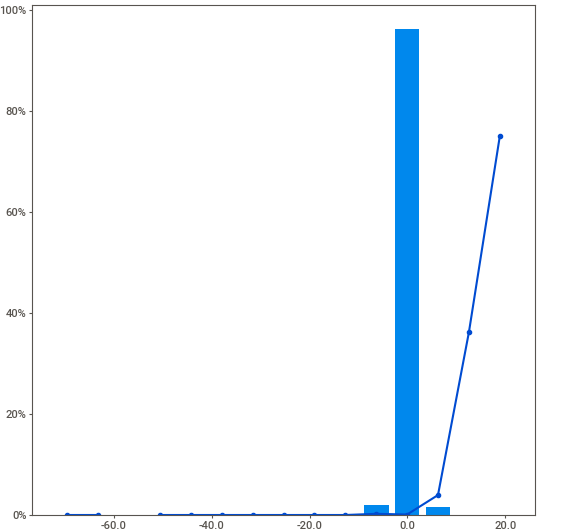
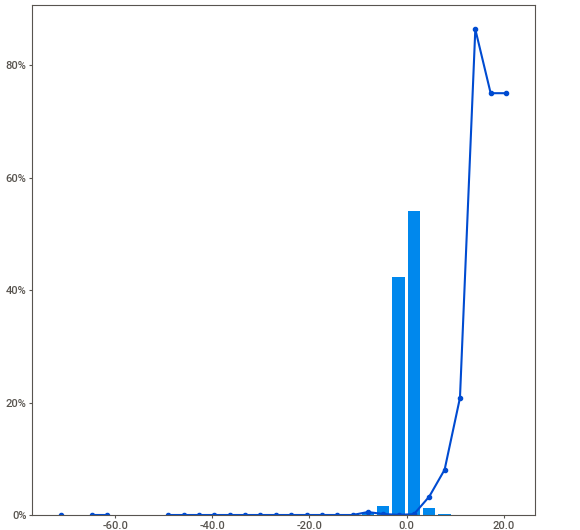
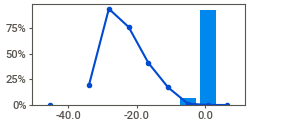
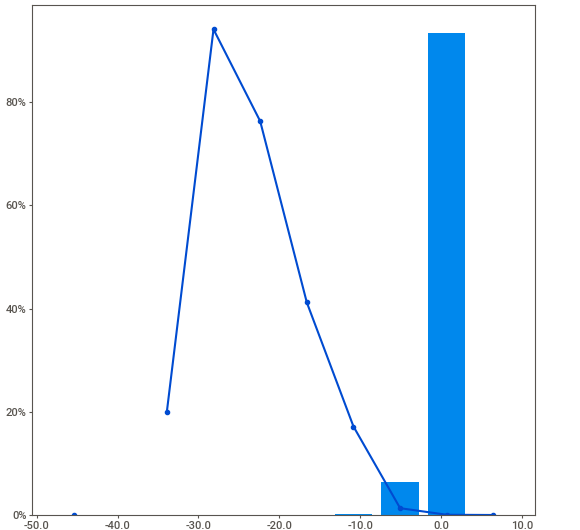
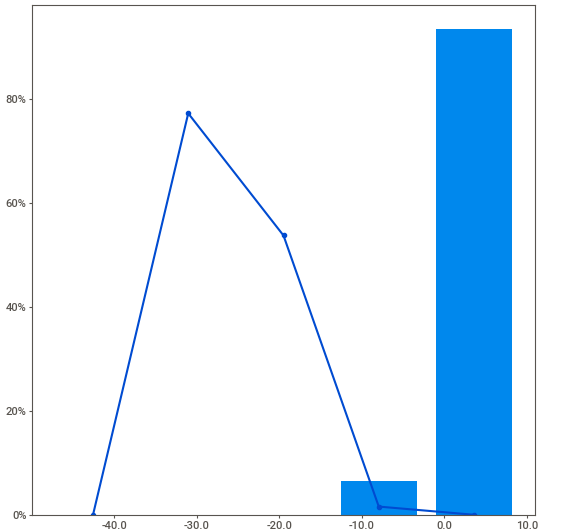
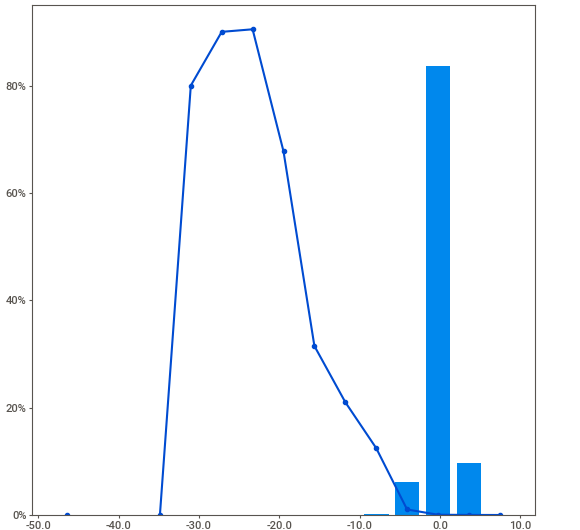
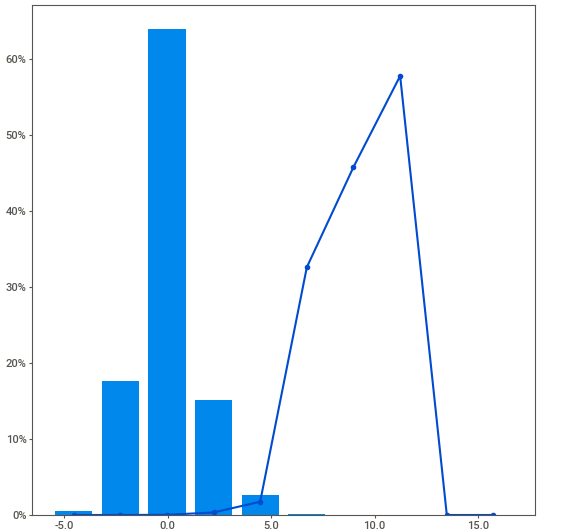
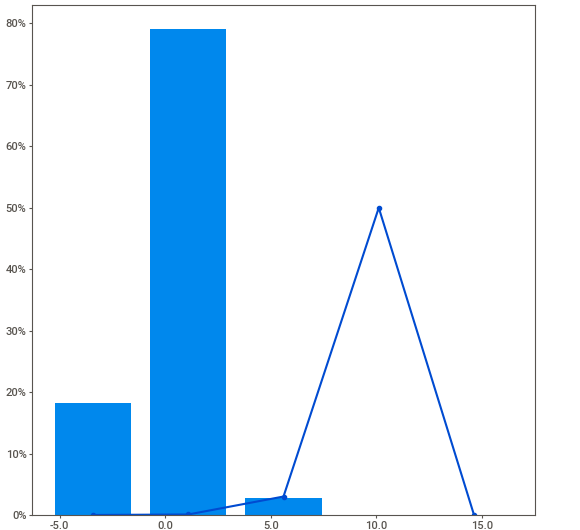
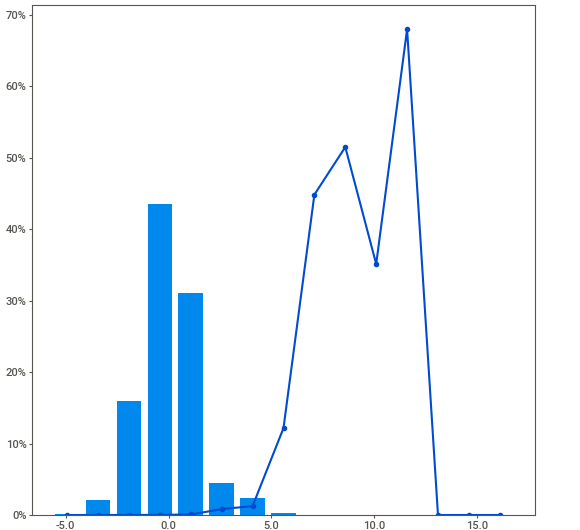
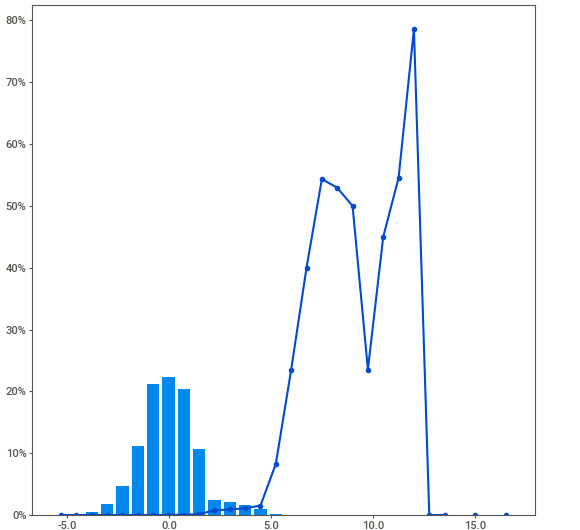
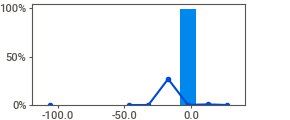
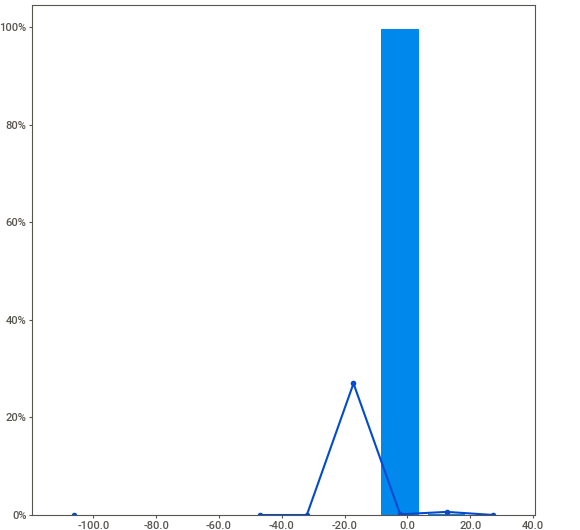
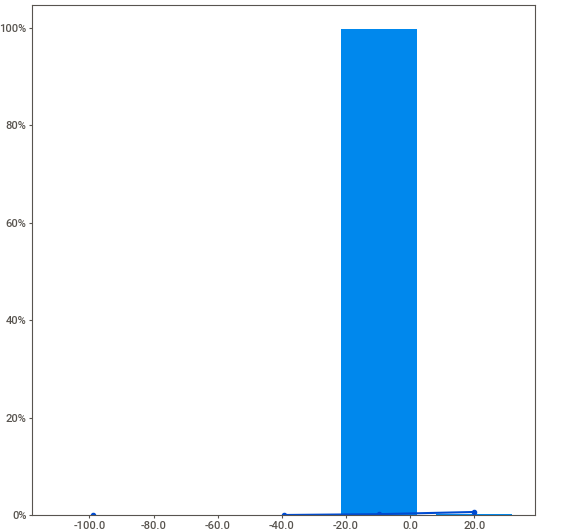
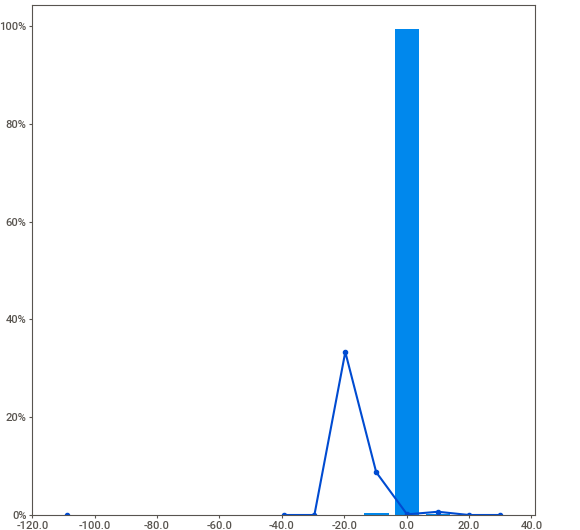
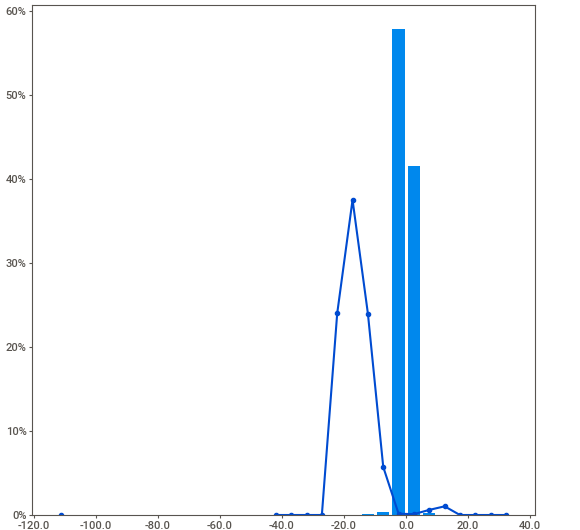
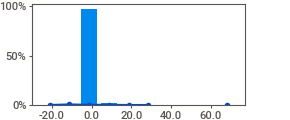
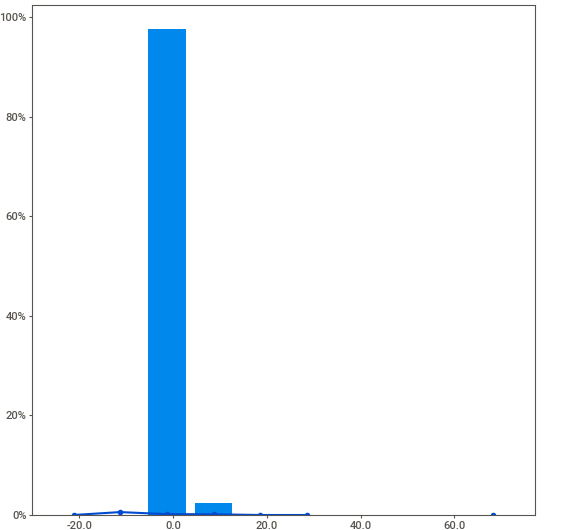
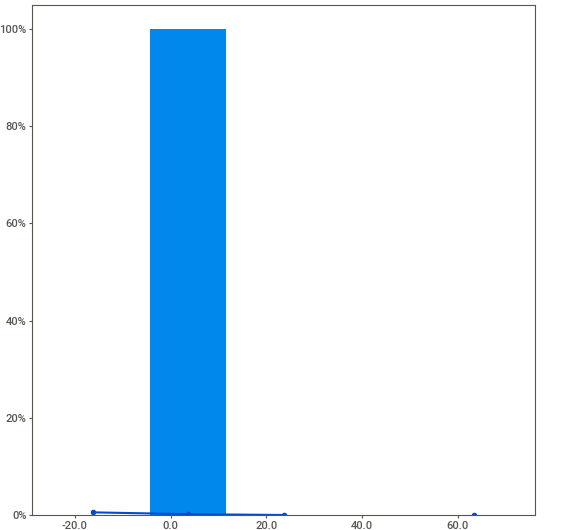
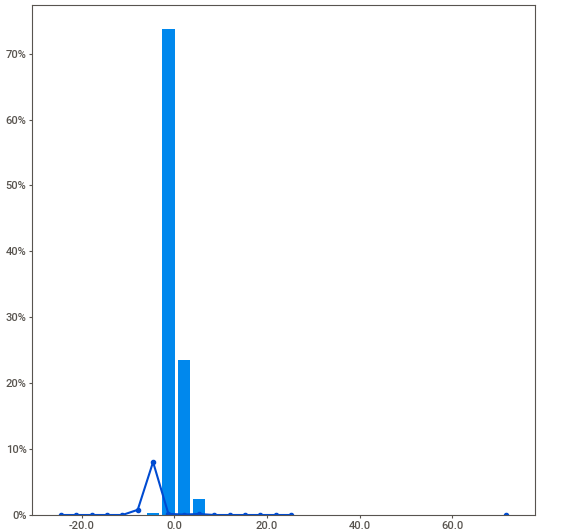
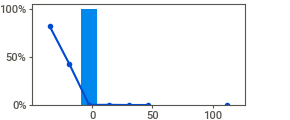
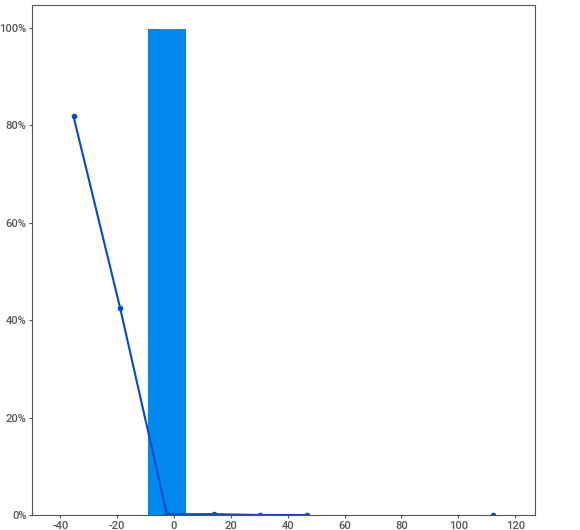
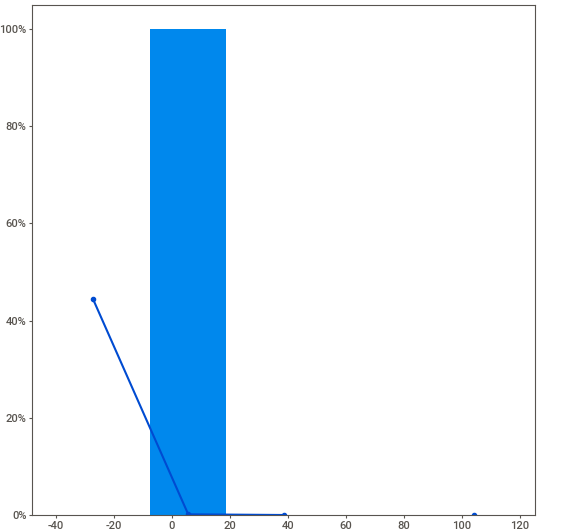
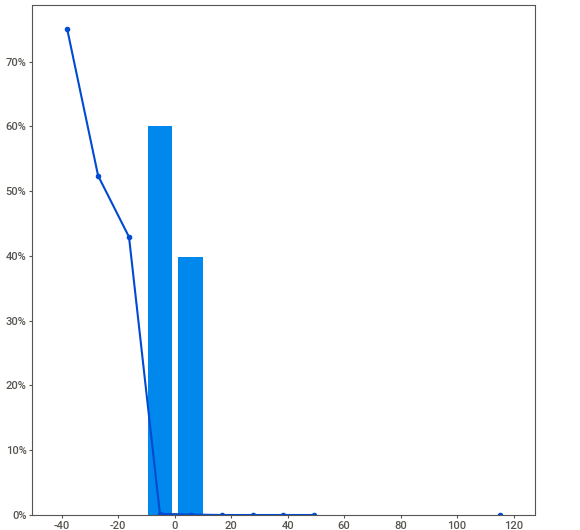
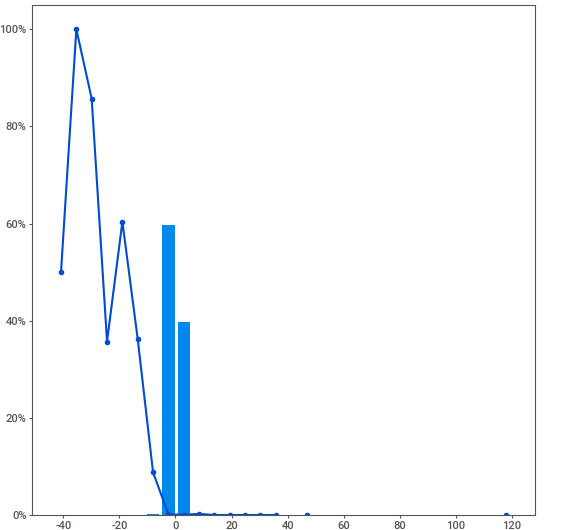
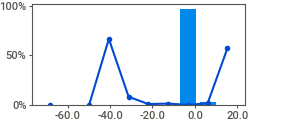
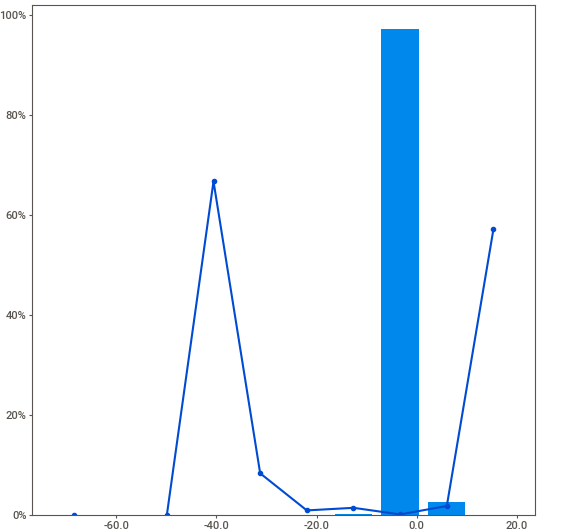
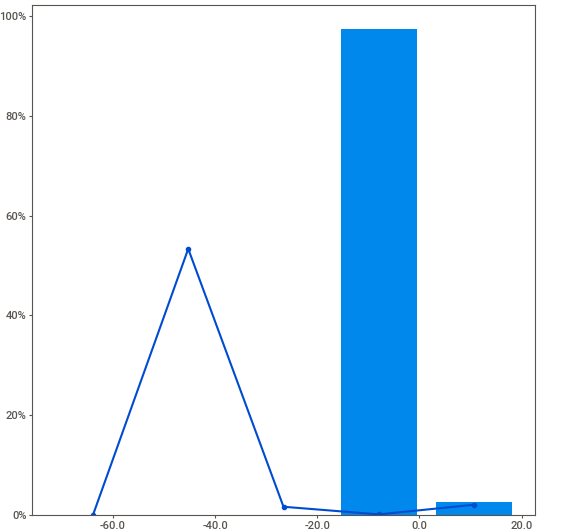
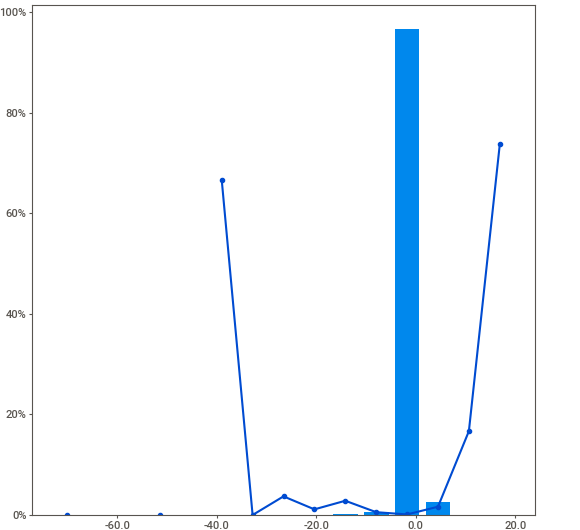
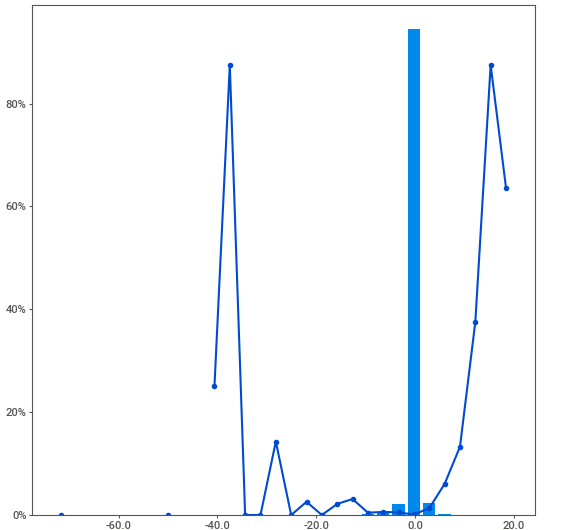
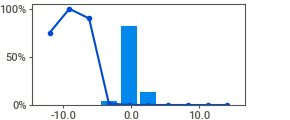
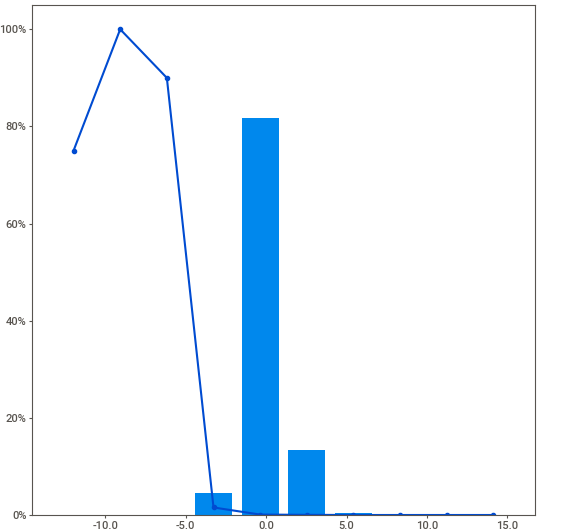
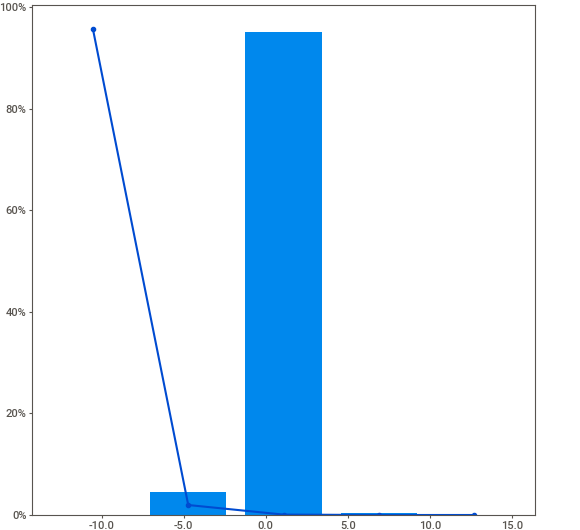
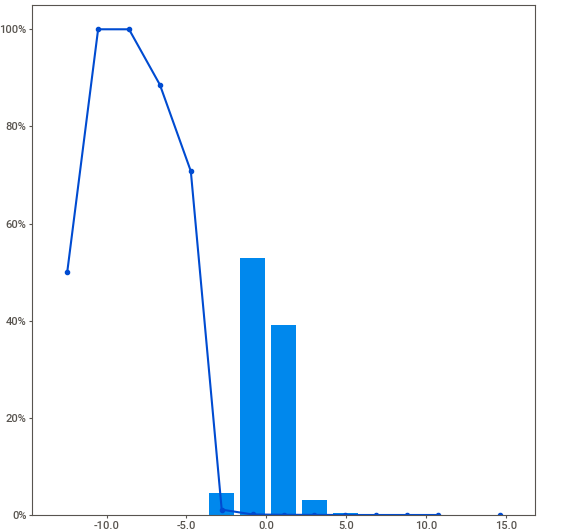
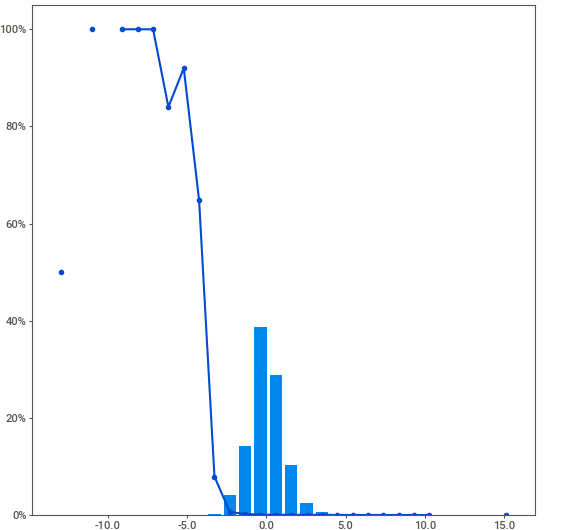
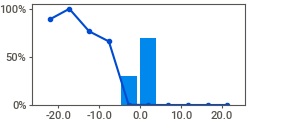
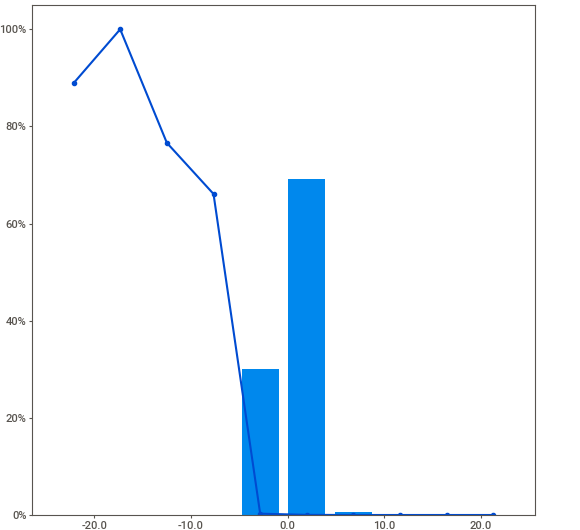
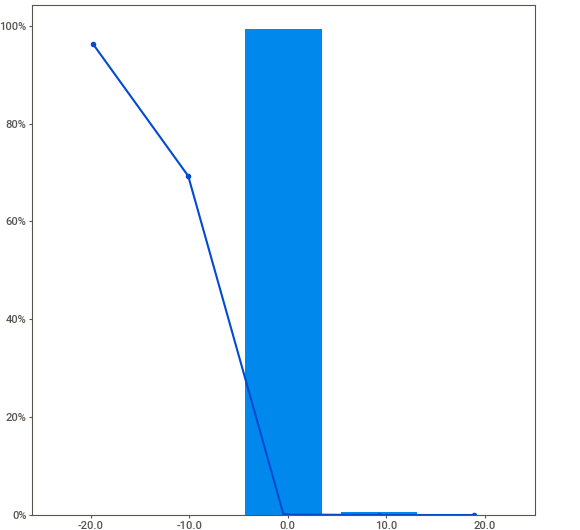
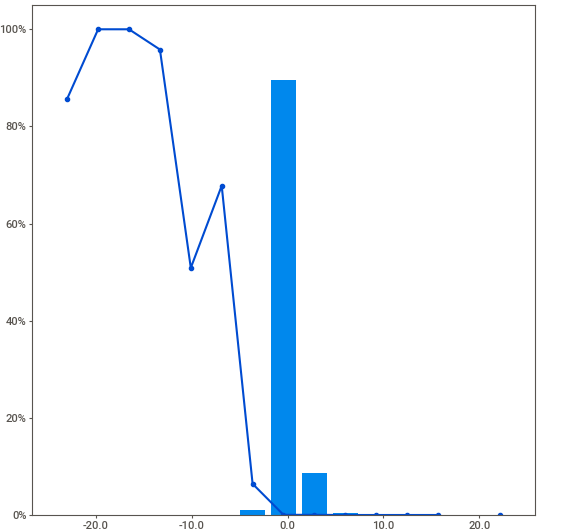
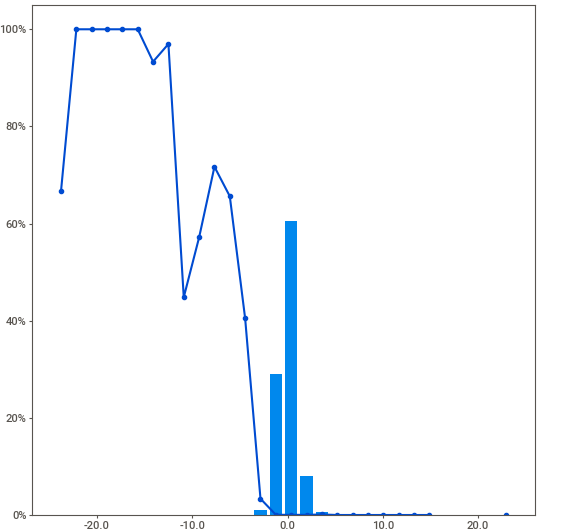
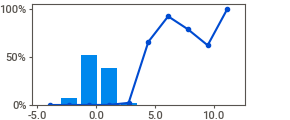
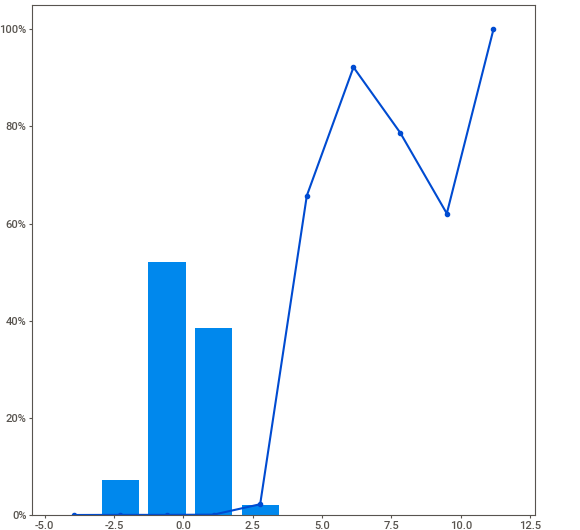
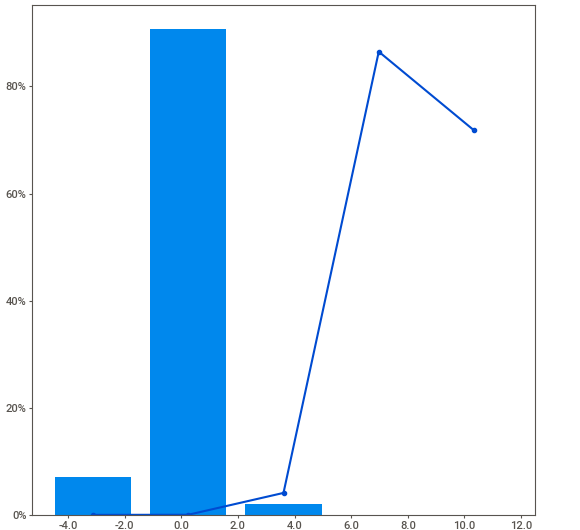
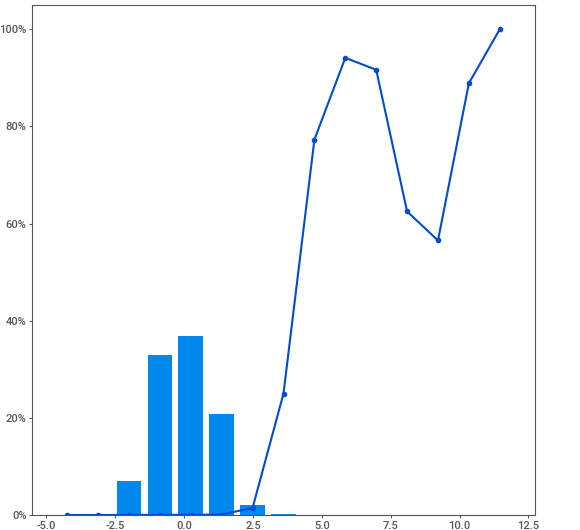
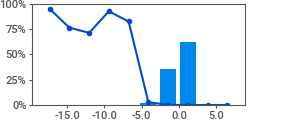
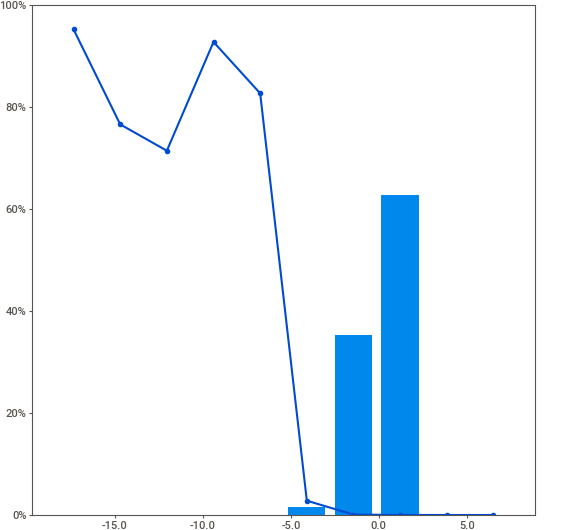
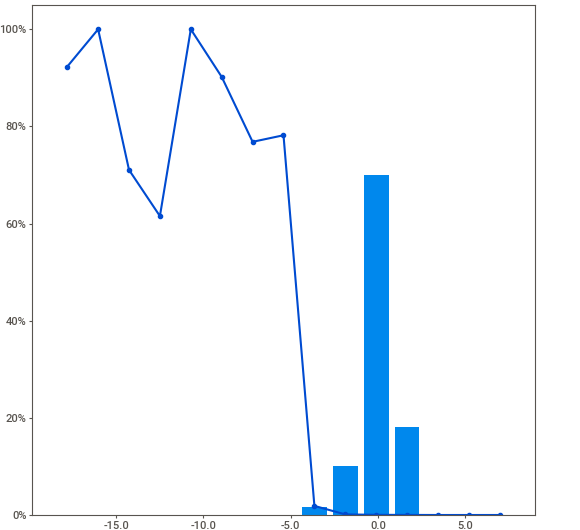
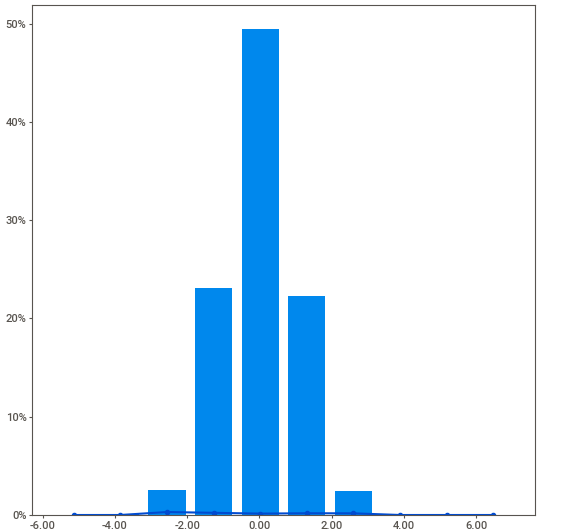
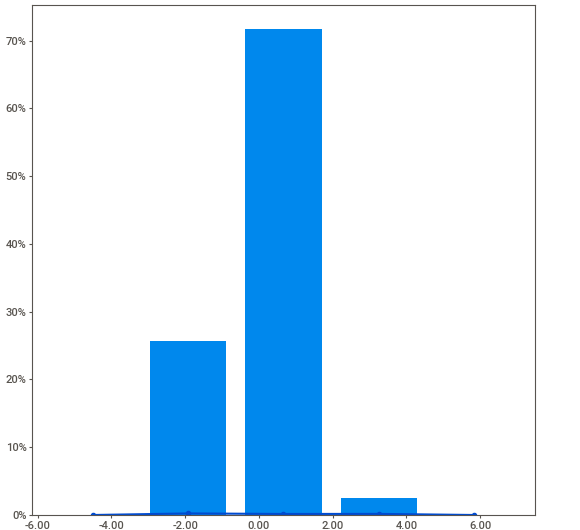
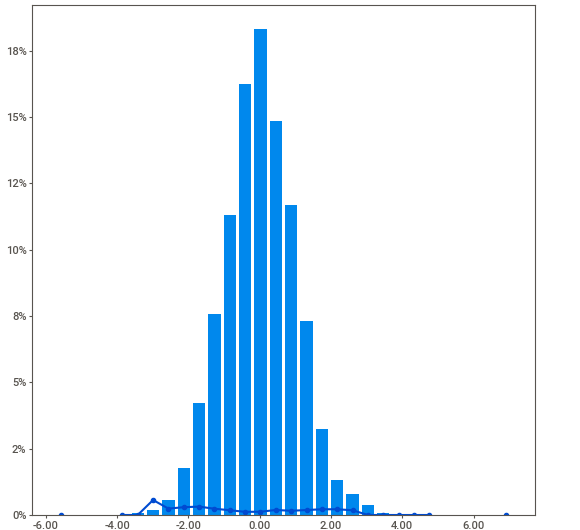
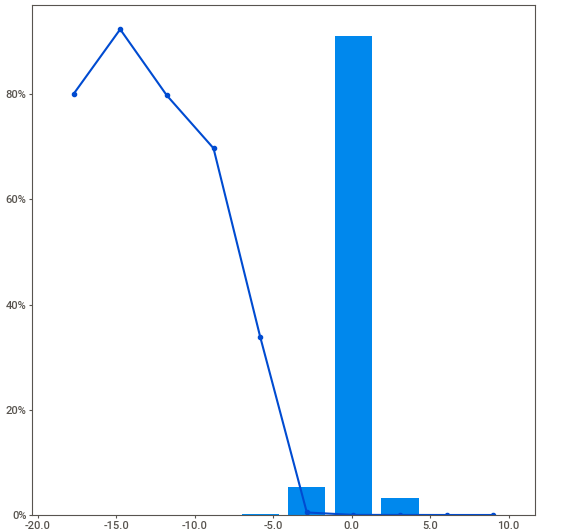
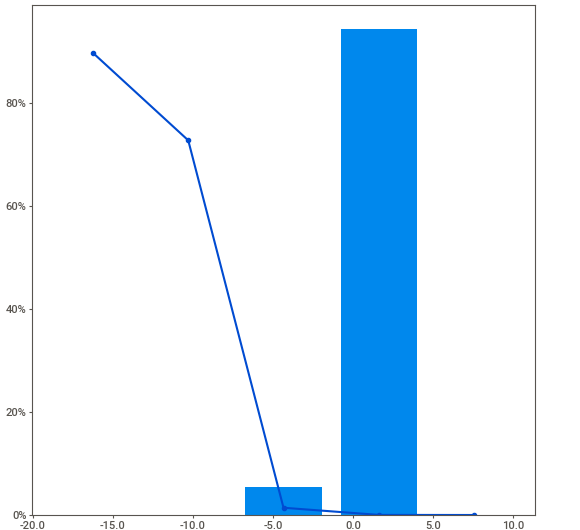
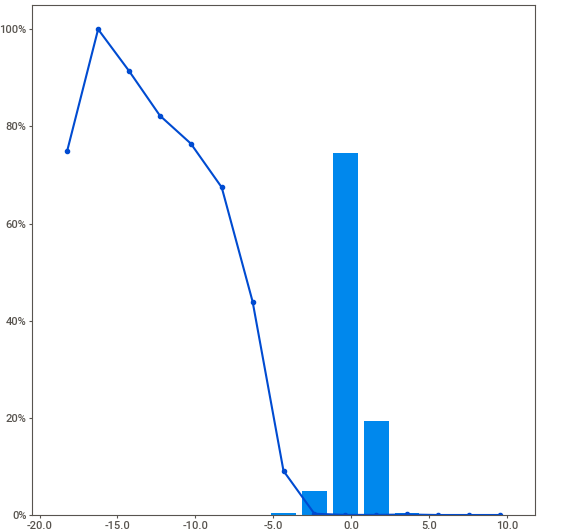
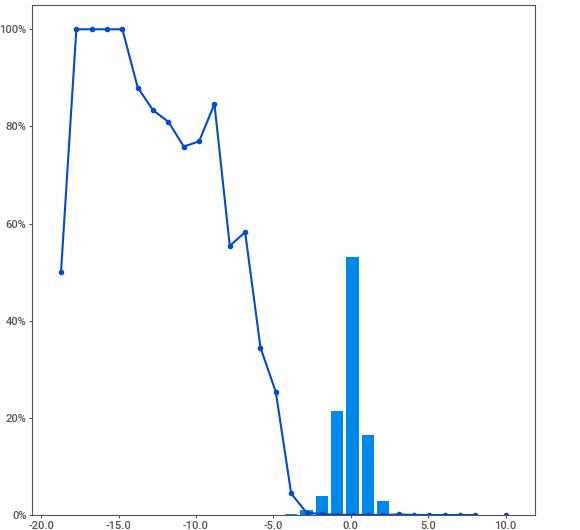
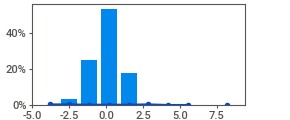
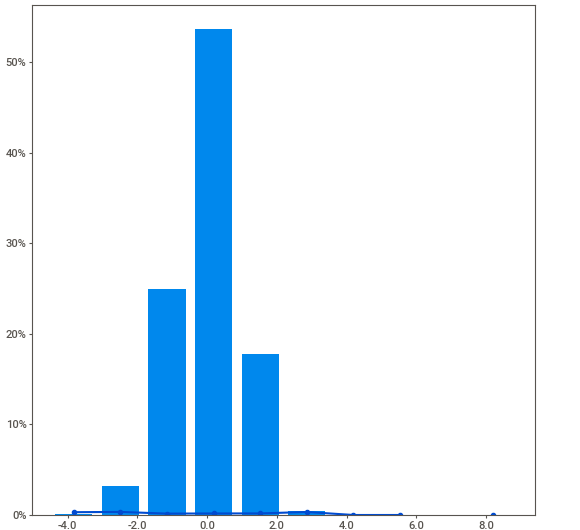
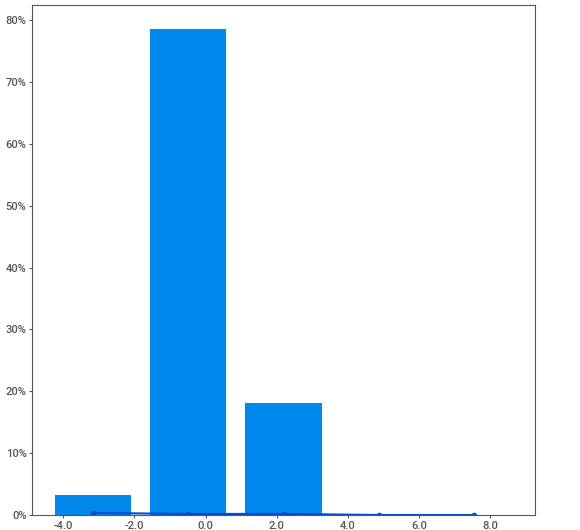
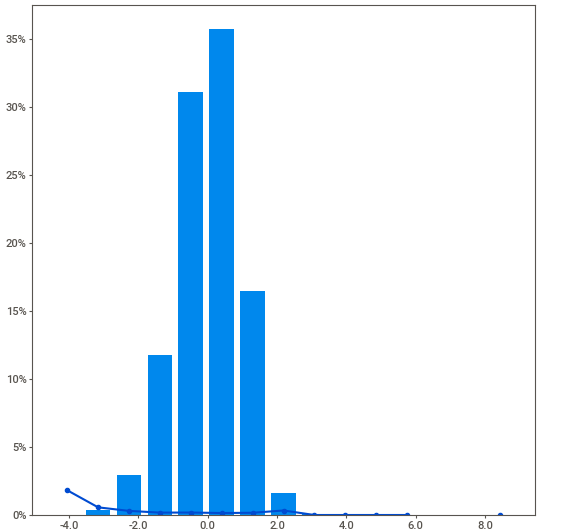
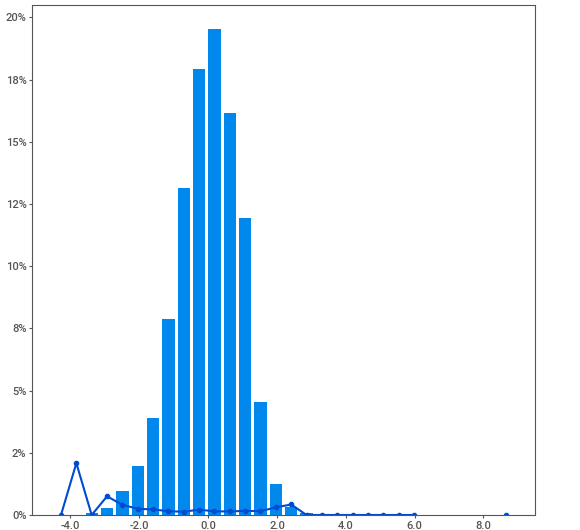
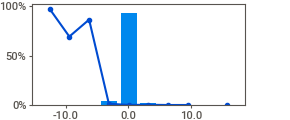
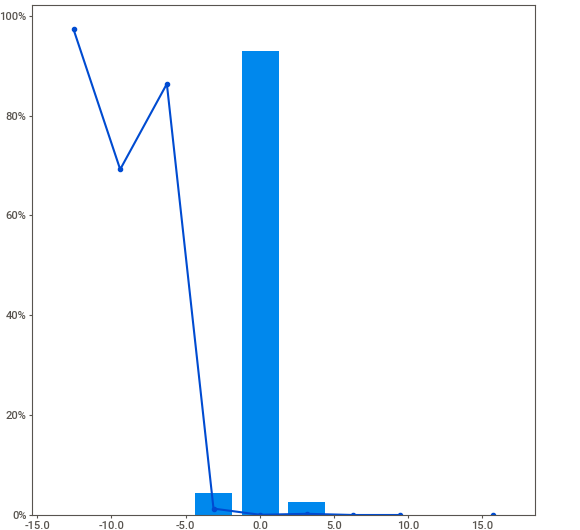
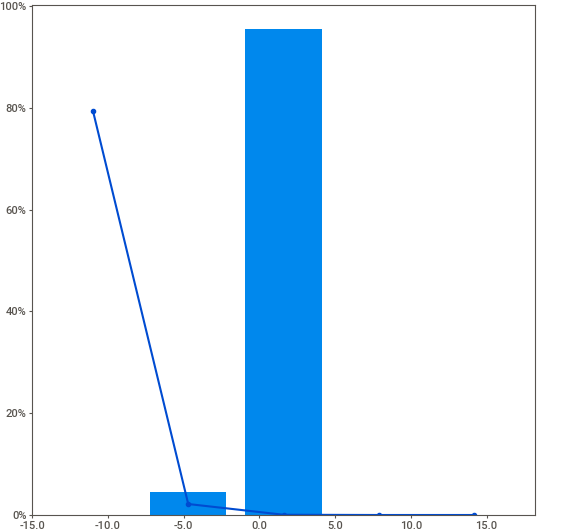
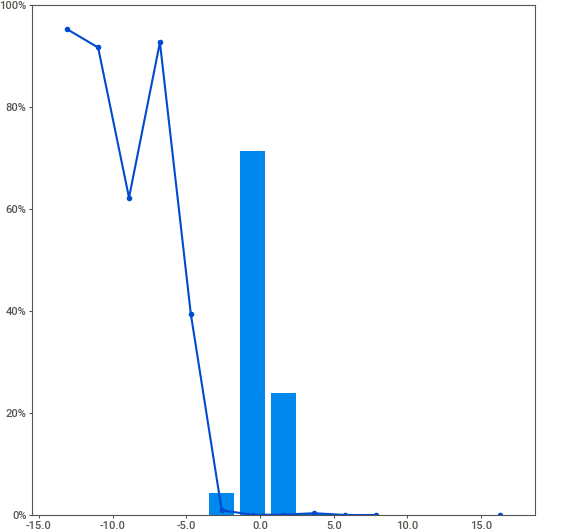
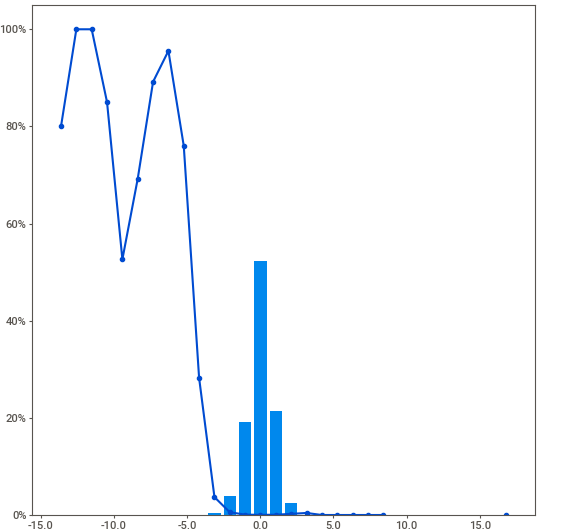
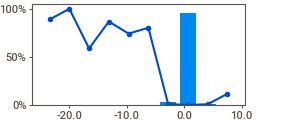
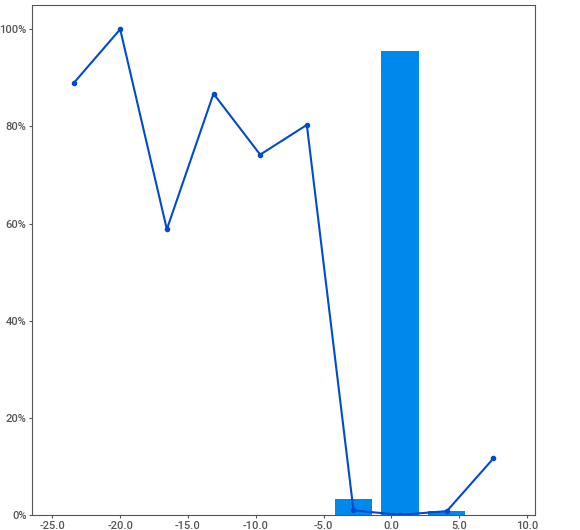
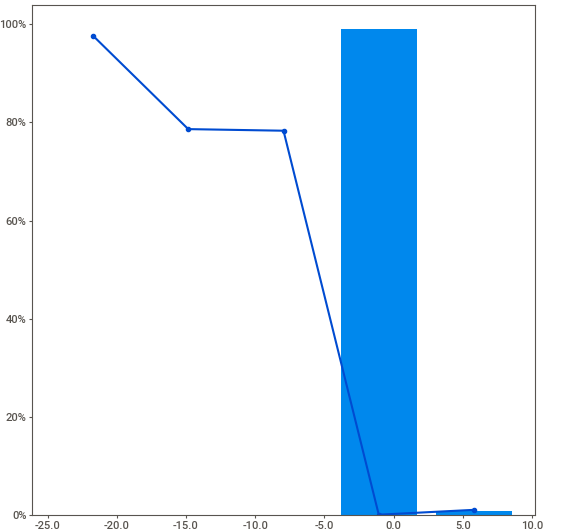
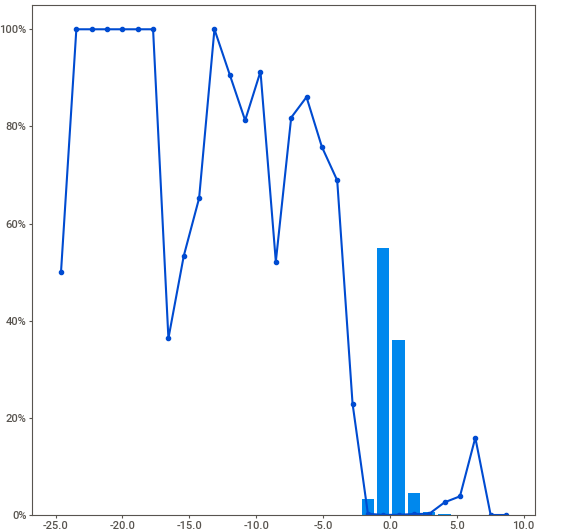
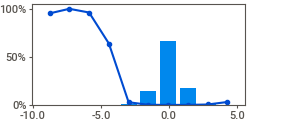
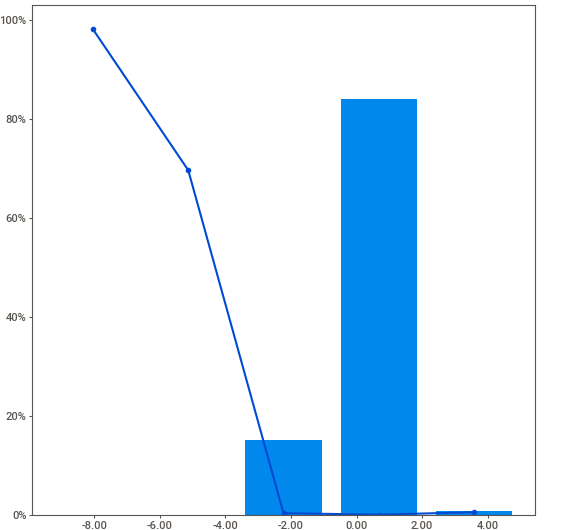
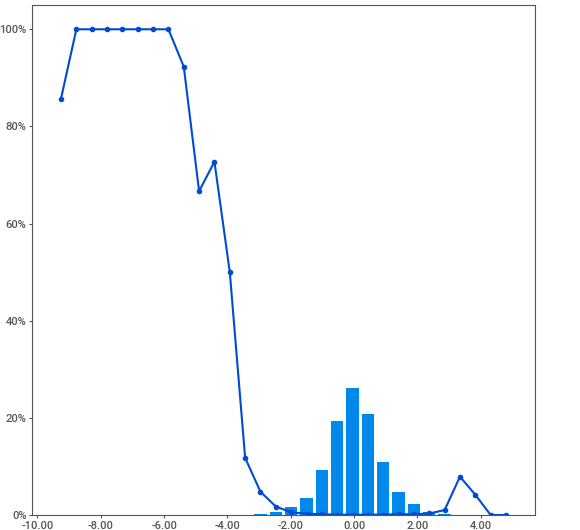
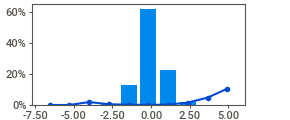
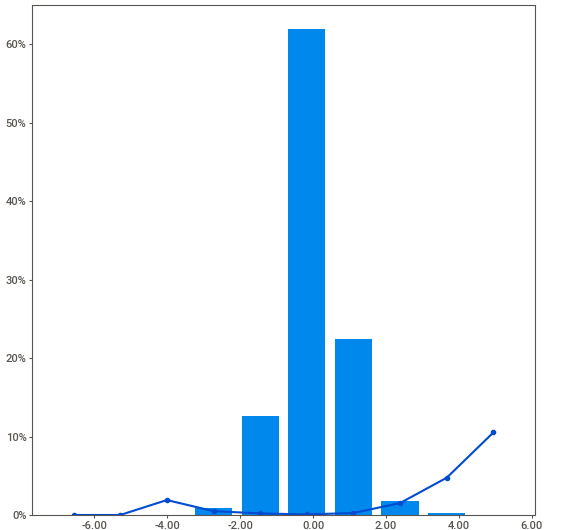
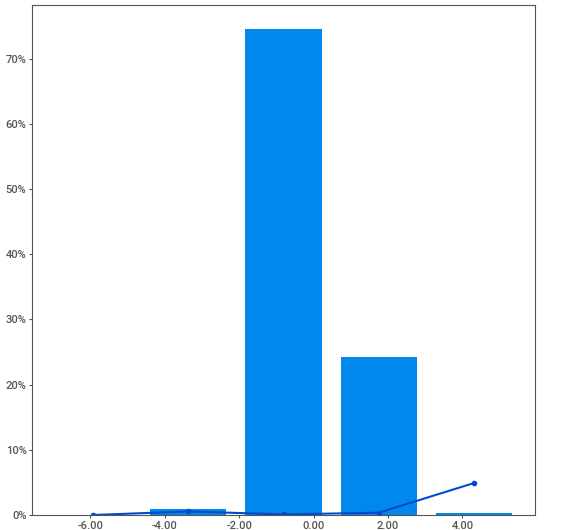
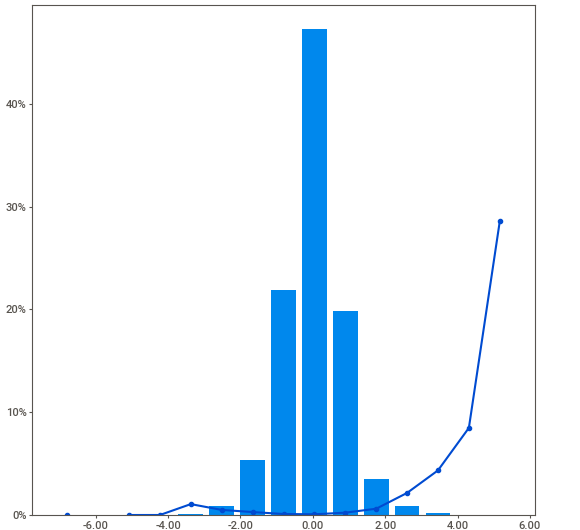
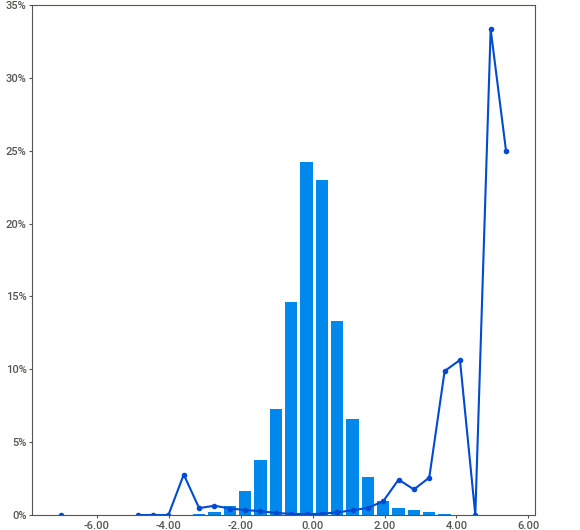
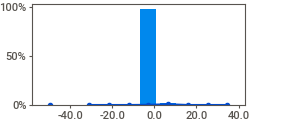
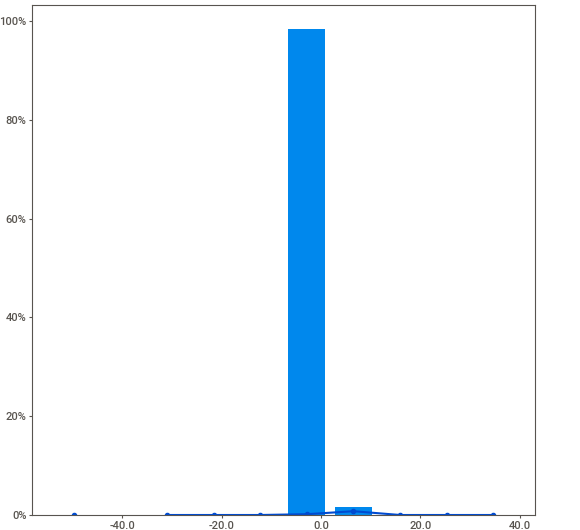
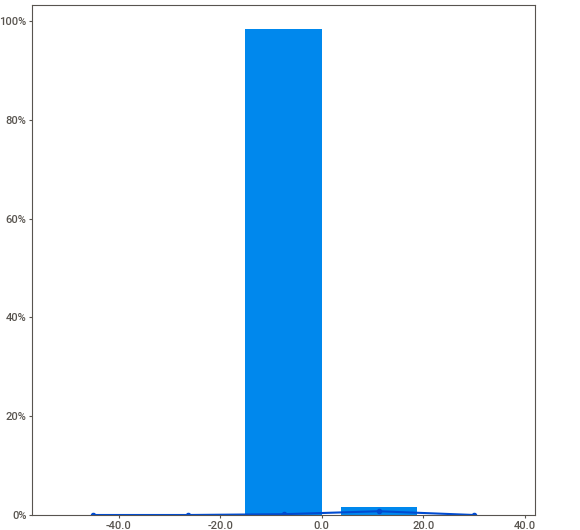
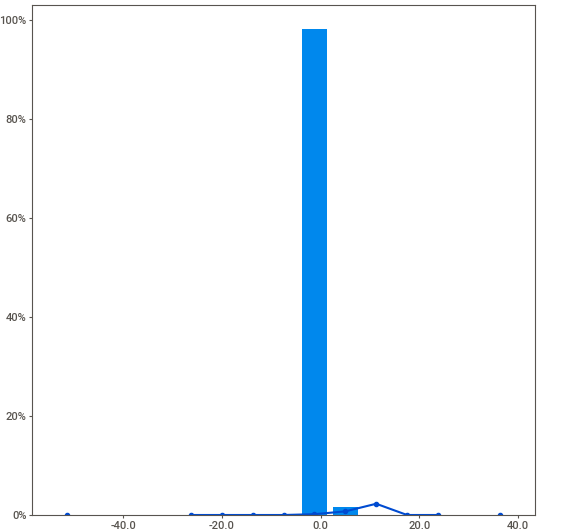
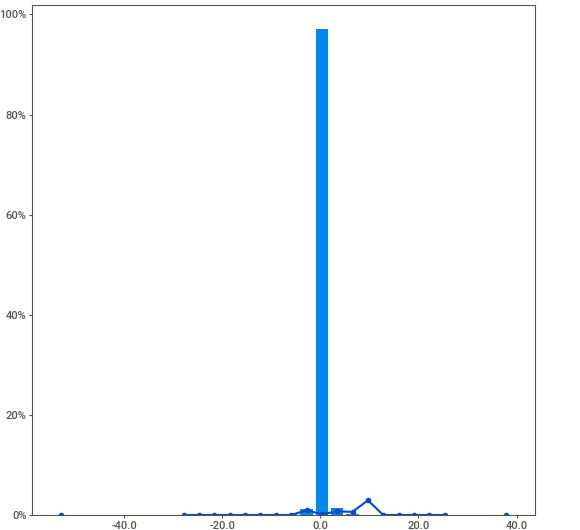
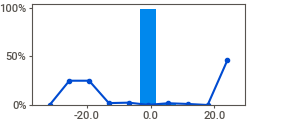
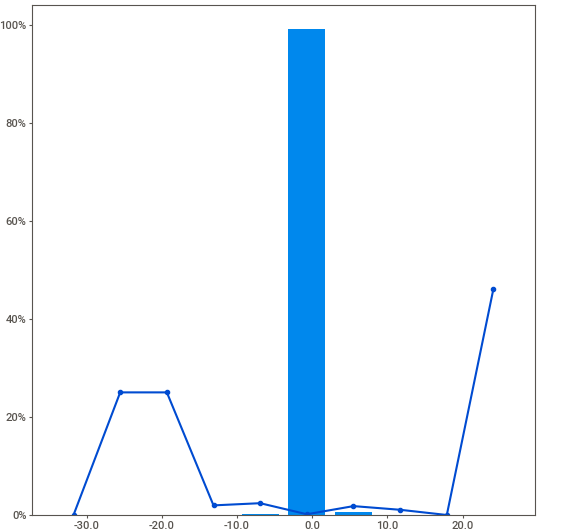
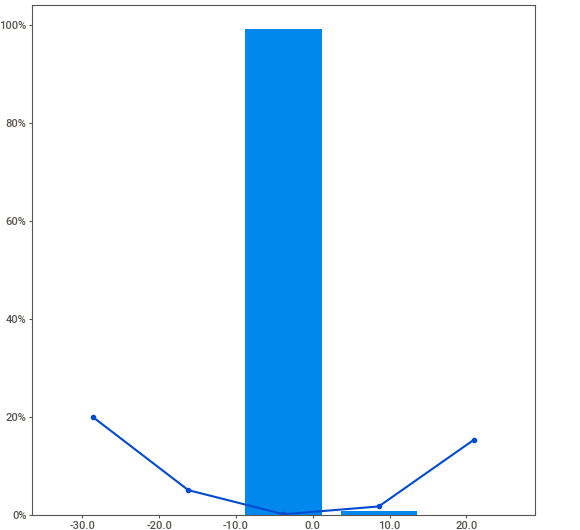
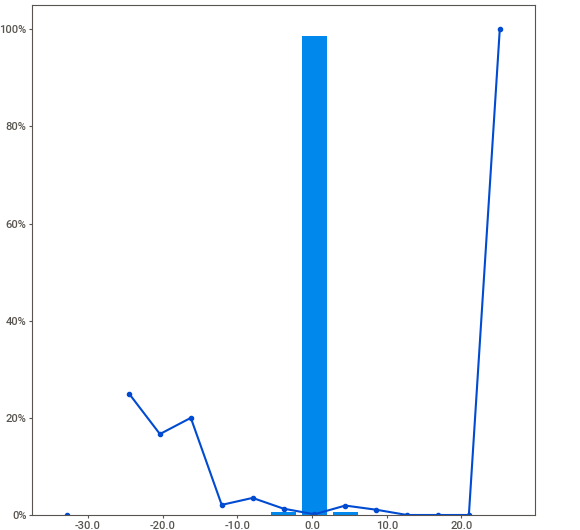
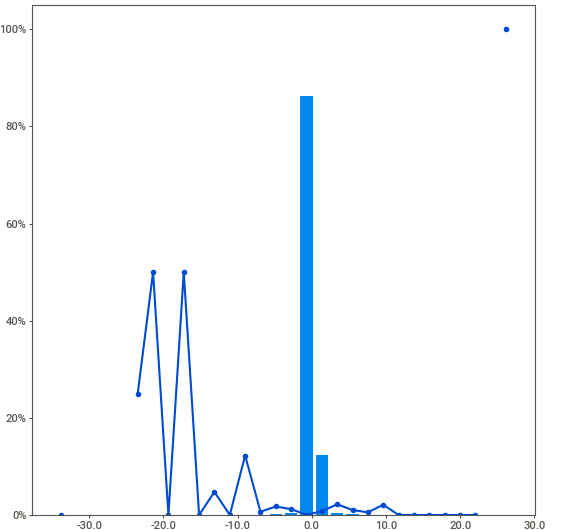
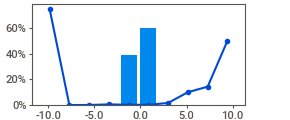
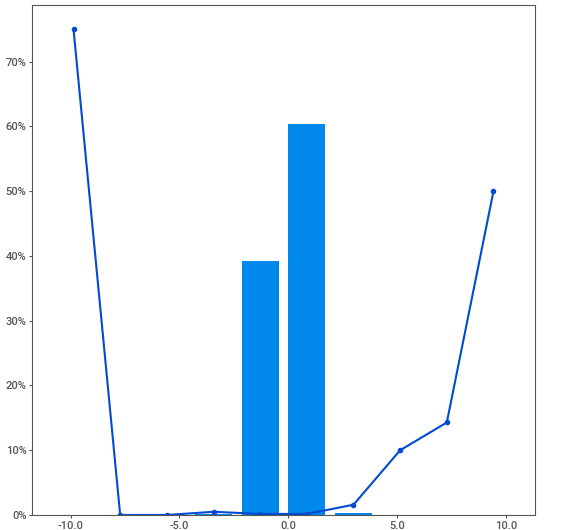
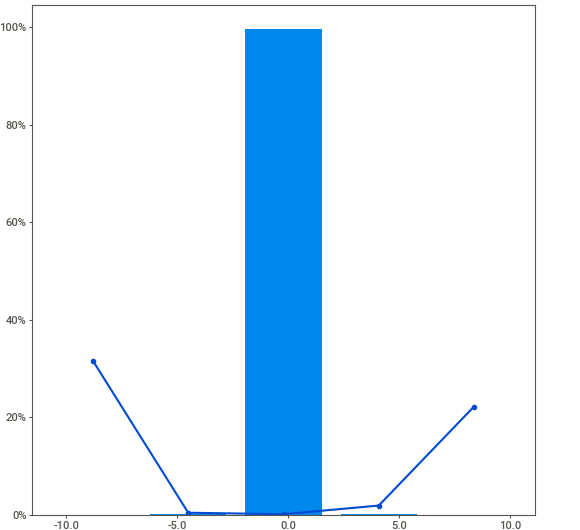
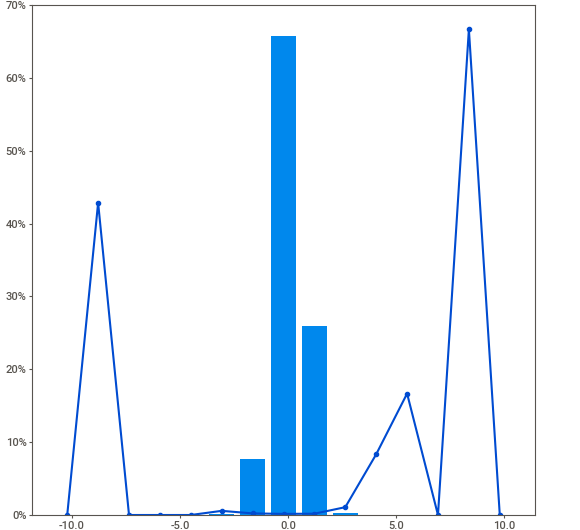
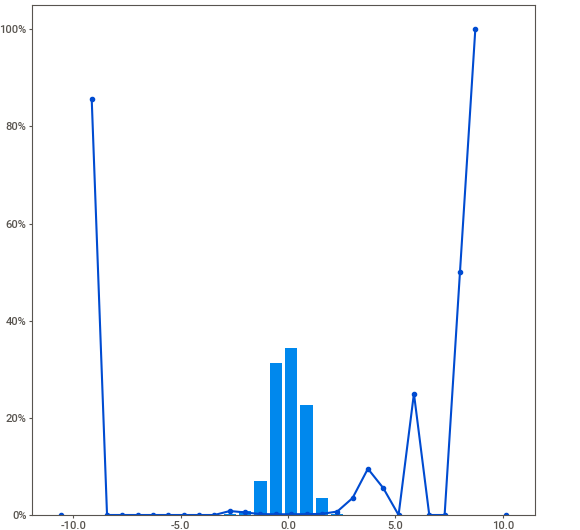
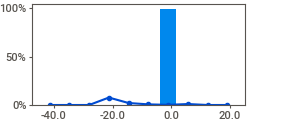
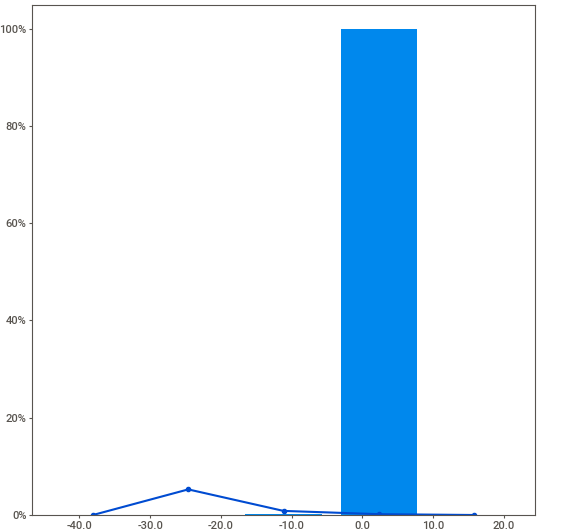
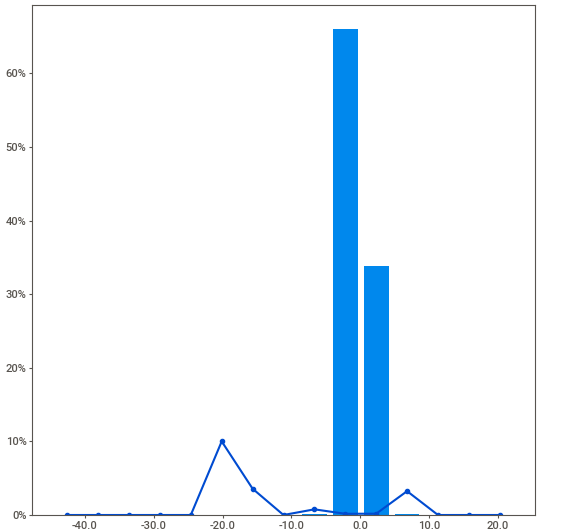
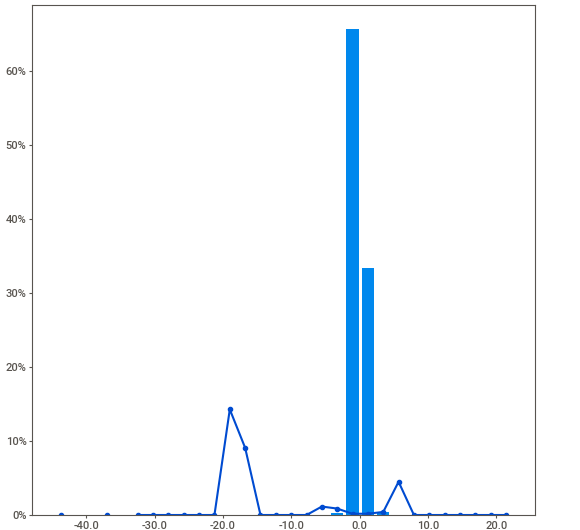
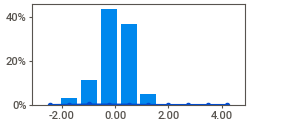
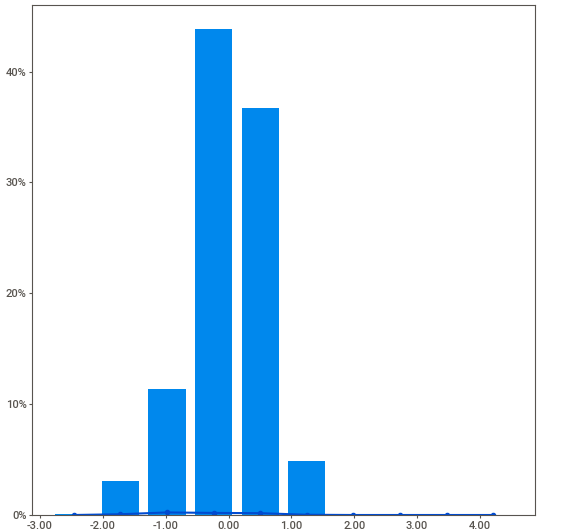
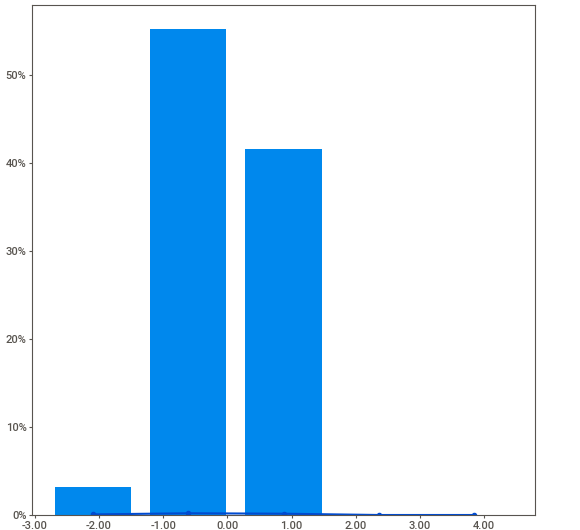
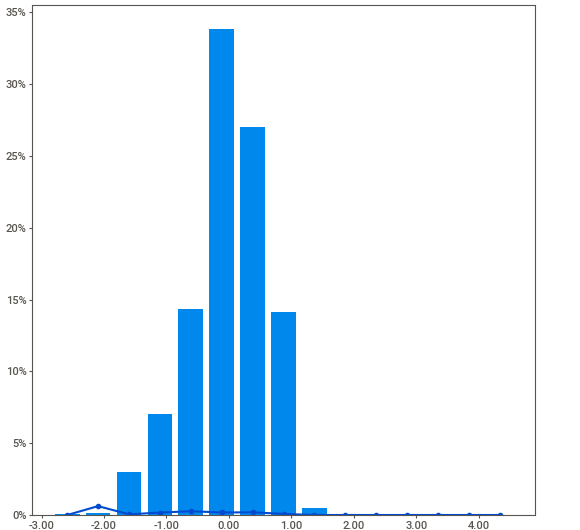
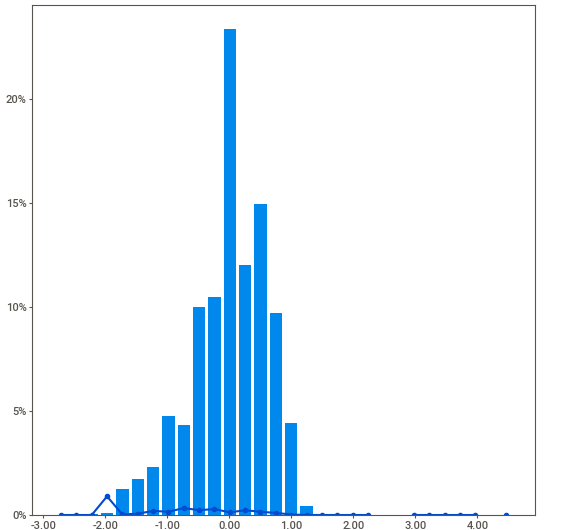
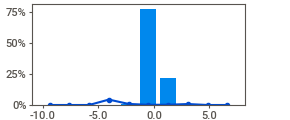
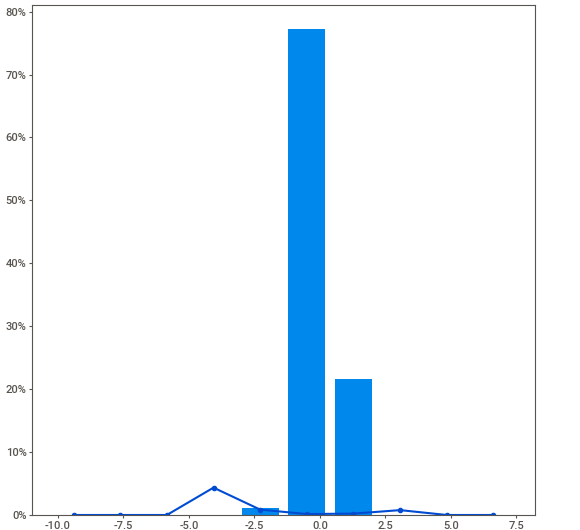
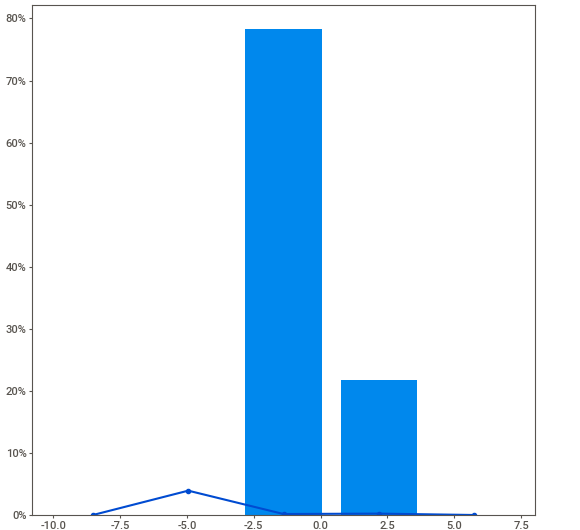
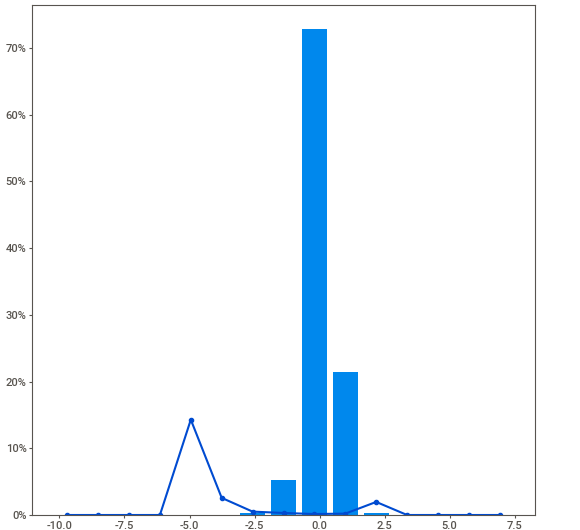
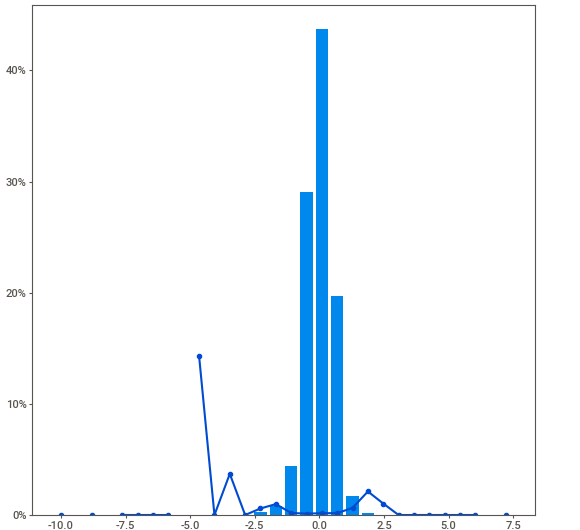
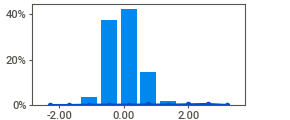
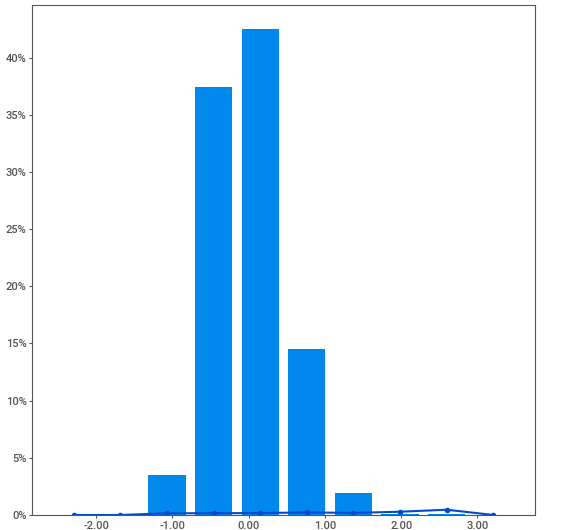
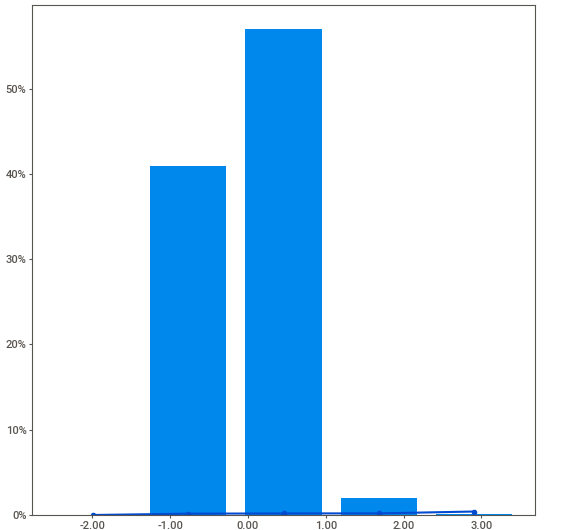
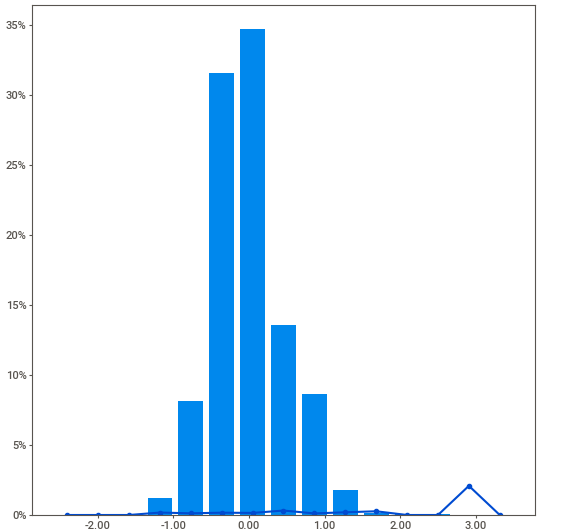
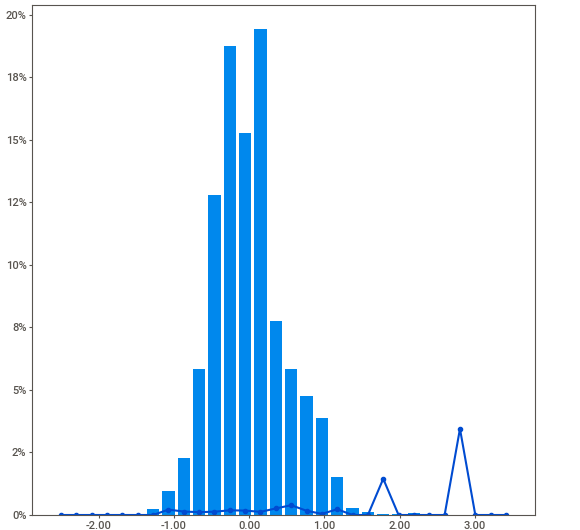
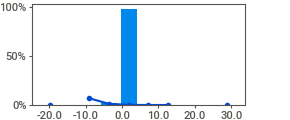
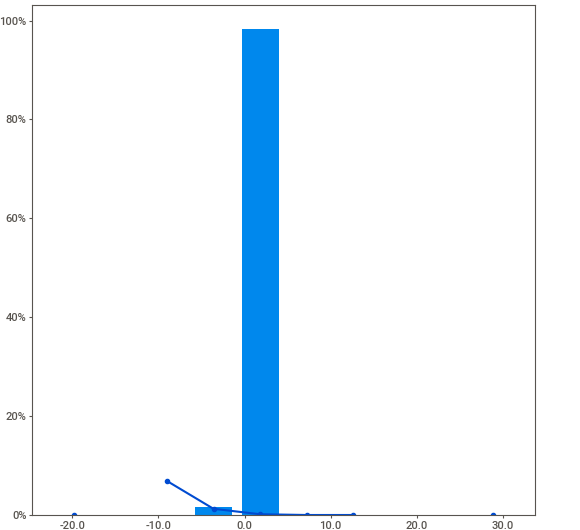
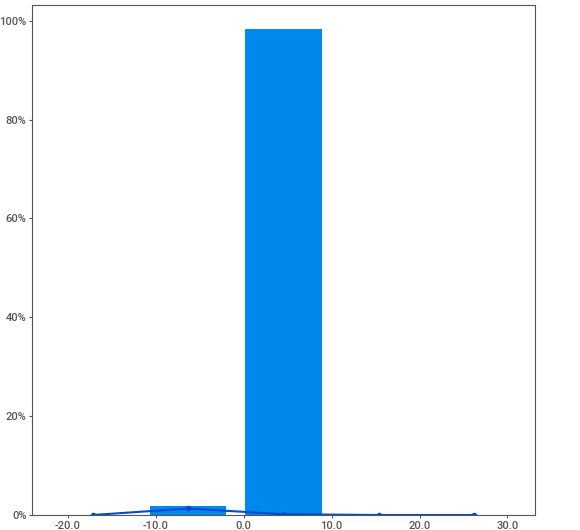
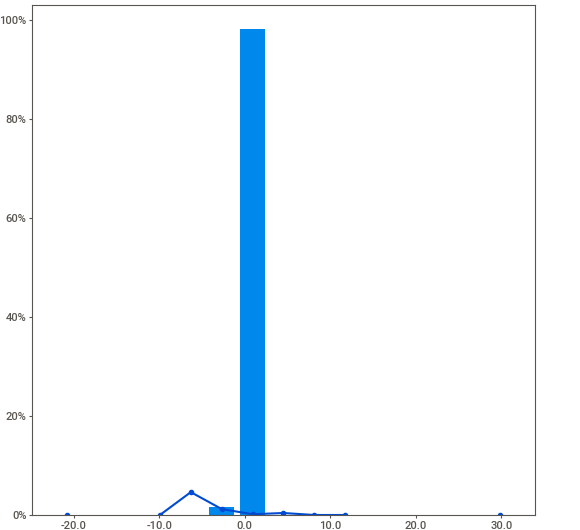
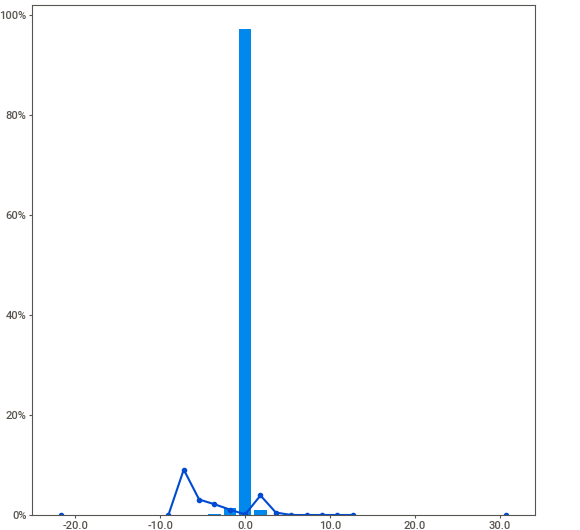
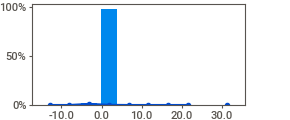
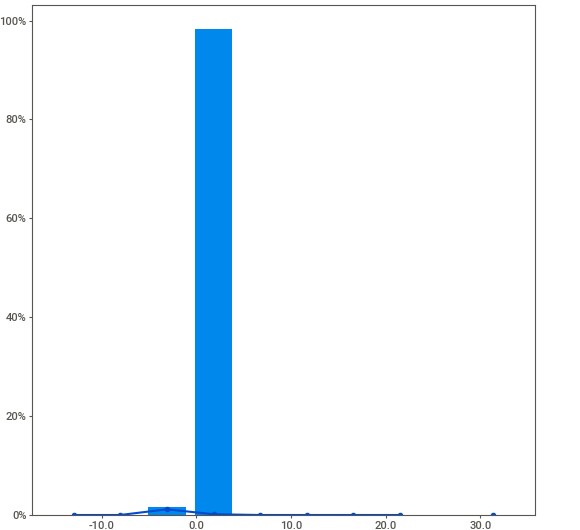
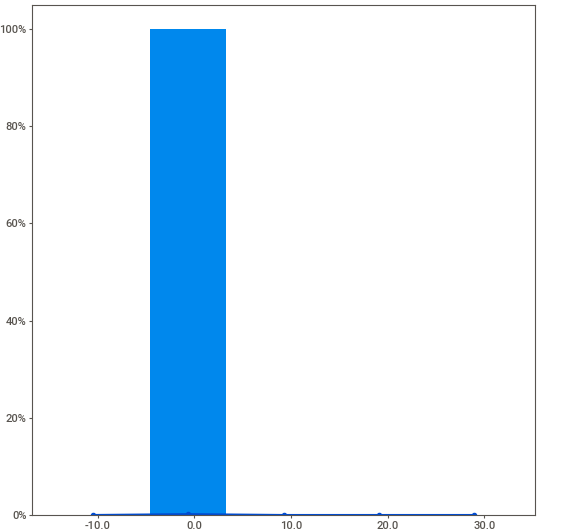
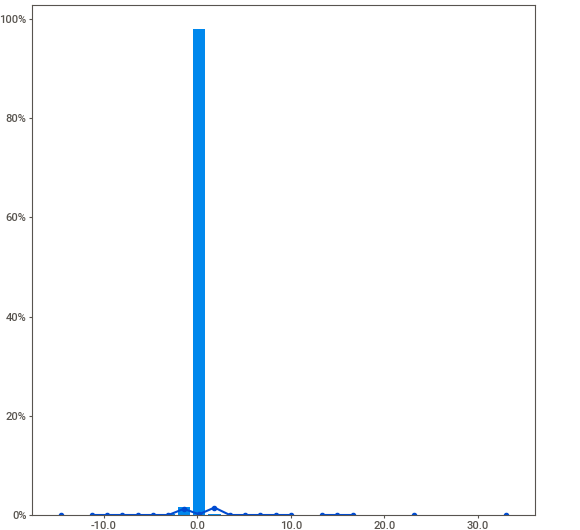
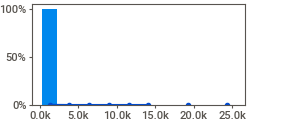
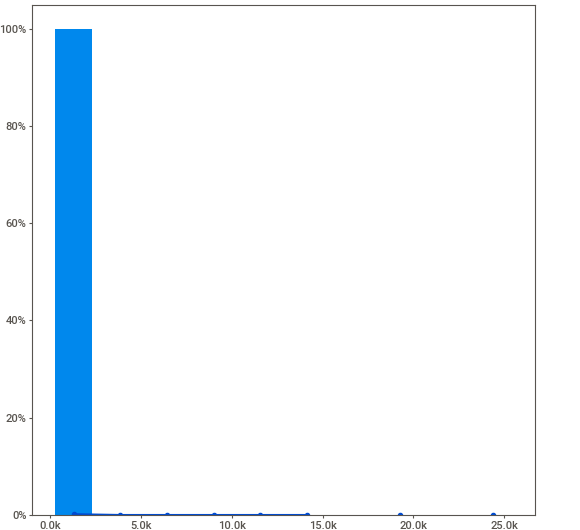
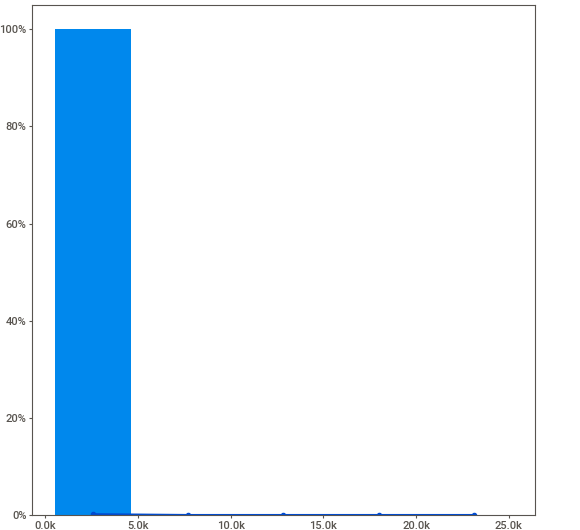
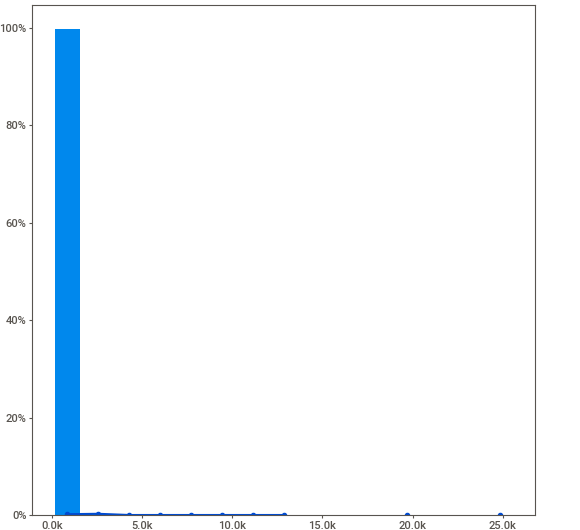
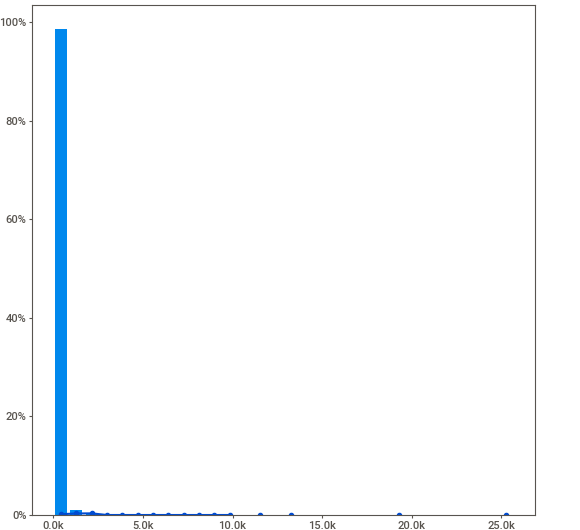
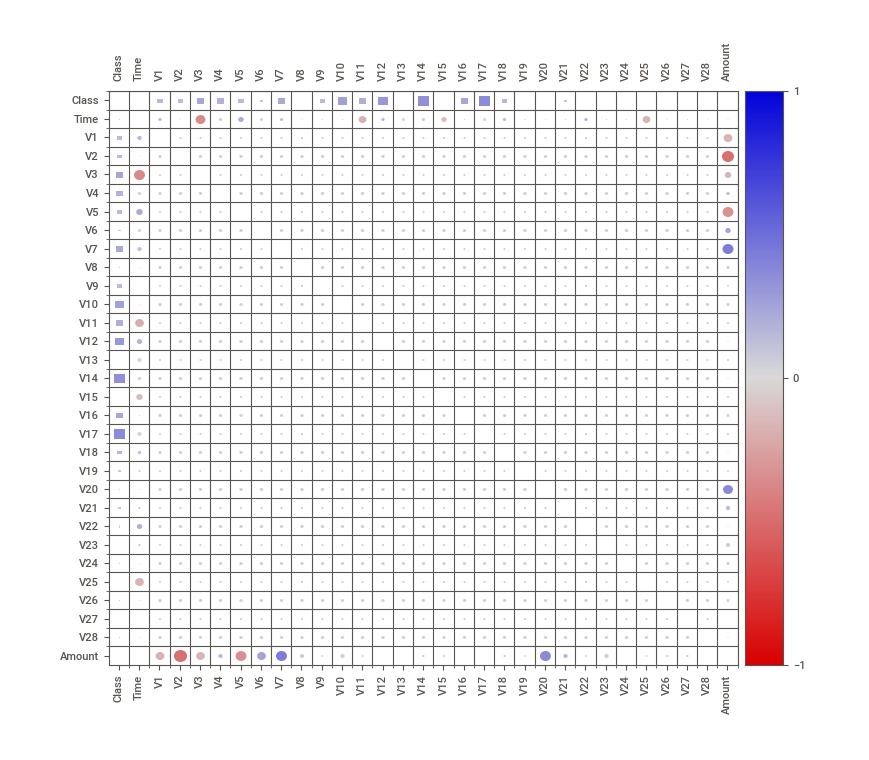
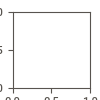

In [9]:
# Observando os dados
dash = sv.analyze(df, target_feat= 'Class')
dash.show_notebook()

Nesse dataset temos 284,315 transações normais e 492 transações fraudulentas

**Observando a distribuição das variáveis**

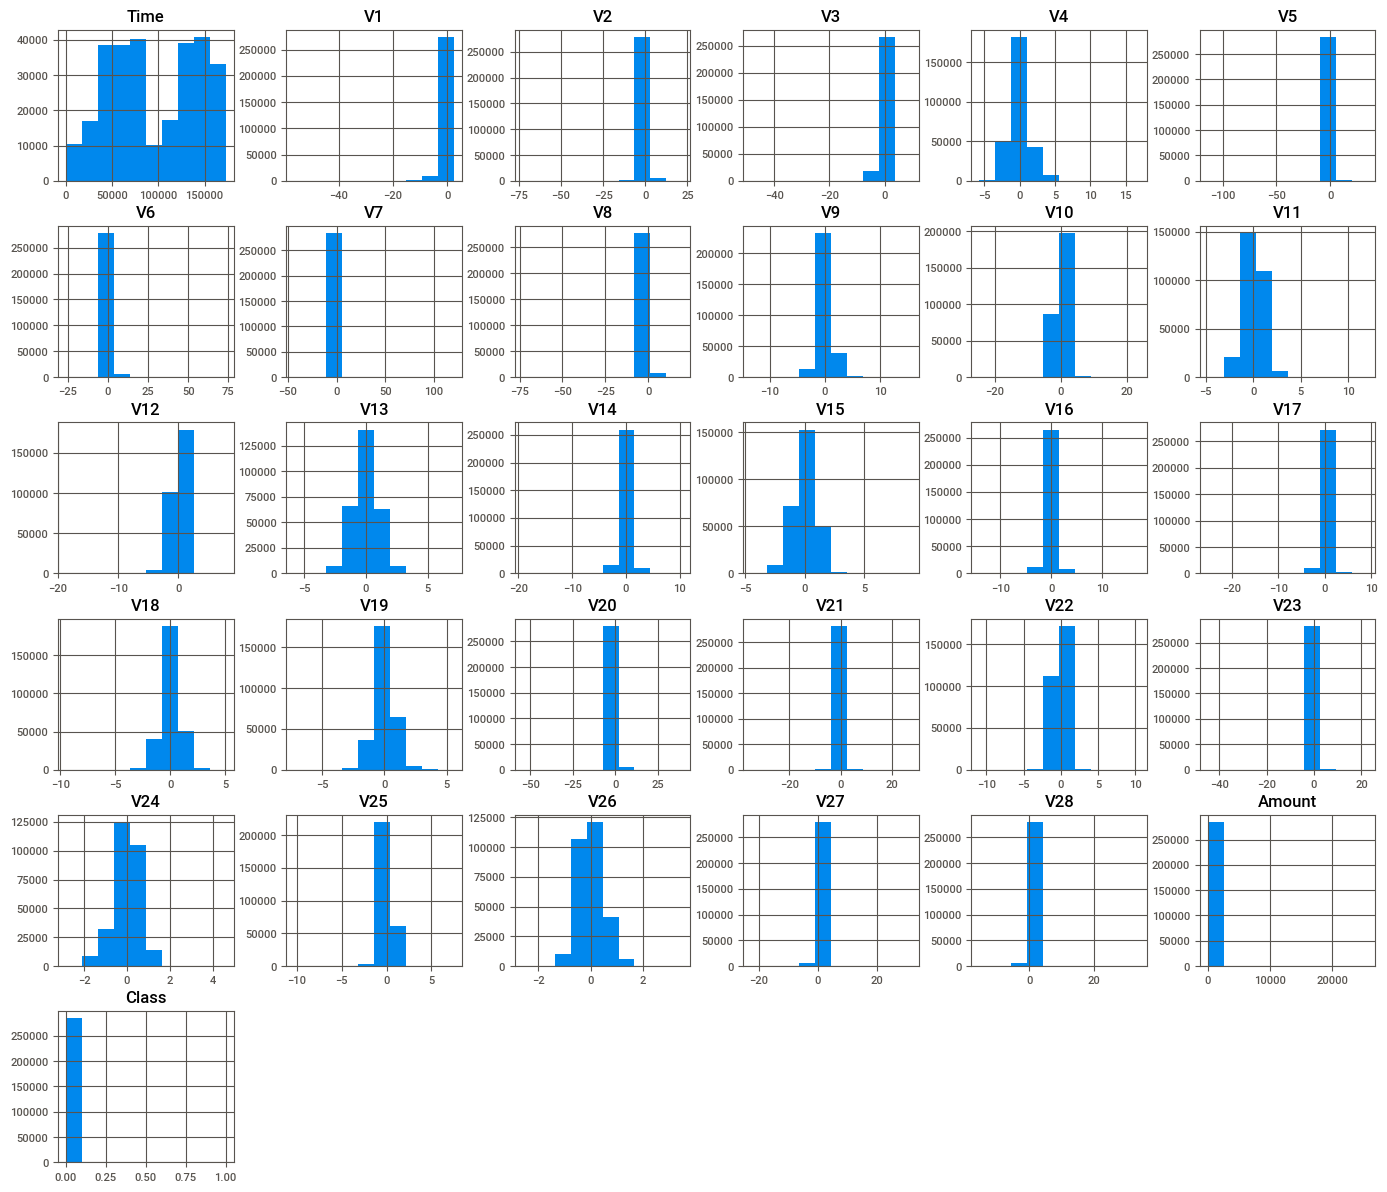

In [10]:
# Criando um gráfico com todas as colunas do dataset
df.hist(figsize=(17,15));

# **4. Pré-Processamento**

Objetivos:

* Eliminar as variáveis que não serão utilizadas;
* Separar amostra dos dados
* Identificação de dados ausentes;
* Remoção de Outliers;
* Escala das variáveis

## **A. Eliminando variavies que não serão utilizadas.**

Aparentemente esse dataset já veio com todas as variáveis categorizadas como importantes para a resolução dessa problemática, então atualmente não tem motivos para excluir nenhuma.

## **B. Separando amostra dos dados.**

*Analisando as dimensões do dataset, percebe-se que ele tem um numero alto de registtros e como boa parte dos modelos de machine learning voltados para classificação são conhecidos como lazy learning e vai ser utilizado , é necessario pegar apenas uma amostra de todos os dados para que os modelos não levem tanto tempo para fazer as predições.*

In [11]:
# Criando um novo DF e utilizando o sample para pegar 25% dos dados, sem reposição.
amostra_df = df.sample(frac = 0.25)

In [12]:
# Observando as dimensões do novo DataFrame
amostra_df.shape

(71202, 31)

##**C. Identificação dados ausentes.**



*Verificando quais as variáveis que tem dados faltantes.*

In [13]:
# Observando dados faltantes e ordenando em ordem decrescente
def soma_ausentes(df):
    p_faltantes = df.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns, 
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False) 

soma_ausentes(amostra_df)

Variavéis  Soma de ausentes
0       Time                 0
16       V16                 0
29    Amount                 0
28       V28                 0
27       V27                 0
26       V26                 0
25       V25                 0
24       V24                 0
23       V23                 0
22       V22                 0
21       V21                 0
20       V20                 0
19       V19                 0
18       V18                 0
17       V17                 0
15       V15                 0
1         V1                 0
14       V14                 0
13       V13                 0
12       V12                 0
11       V11                 0
10       V10                 0
9         V9                 0
8         V8                 0
7         V7                 0
6         V6                 0
5         V5                 0
4         V4                 0
3         V3                 0
2         V2                 0
30     Class                 0

*Não existem valores ausentes, então não haverá necessidade de nenhum tratamento desse tipo.*

## **D. Remoção de outliers.**



*Como esse problema se trata da detecção de fraudes, e a maioria de suas variáveis não estão especificadas por se tratar de dados sensíveis, optei por não excluir os outliers, pois pode acontecer de algum outlier representar uma fraude e caso esse outlier for tratado consequentemente um componente importante para a predição do modelo seria perdido, dito isso não será feito nenhuma remoção de outliers.*

## **E. Escala das Variáveis.**

**Processamento das variáveis numéricas:**

Como as variáveis estão em escalas diferentes, isso pode acabar causando problemas nos modelos de Machine Learning, dessa forma o próximo passo vai ser padronizar os dados
das variáveis.

In [14]:
# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


# Padronização dos dados da amostra
amostra_df[['Time',	'Amount']] = sc.fit_transform(amostra_df[['Time',	'Amount']])

# Padronização dos dados completos
df[['Time',	'Amount']] = sc.fit_transform(df[['Time',	'Amount']])

In [15]:
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28    Amount  Class  
0 -0.021053  0.244964      0  
1  0.014724 -0.342475      0  
2 -0.059752  1.160686      0  
3  0.061458  0.140534      0  
4  0.215153 -0.073403      0

In [16]:
amostra_df.head()

Time        V1        V2        V3        V4        V5        V6  \
55133  -1.004783 -0.091984  0.880505  1.117543  0.672794  0.731902 -0.324548   
149396 -0.069803  0.467748  1.130225  0.101908  4.410819  1.582408  1.116155   
208425  0.899181  1.950953 -0.297466 -1.762062  0.206810  0.388730 -0.573164   
117947 -0.412712 -0.760709  0.582143  1.780027 -1.297864 -0.238865 -0.902091   
241667  1.194489  2.054141 -0.056158 -1.617610  0.225545  0.355339 -0.937308   

              V7        V8        V9       V10       V11       V12       V13  \
55133   0.894480 -0.302180 -0.382056  0.018638 -1.264967 -0.730199 -0.307854   
149396  0.658028 -0.125699 -0.557858  1.752354  0.545039 -3.741468  0.215929   
208425  0.275159 -0.268253  0.625504 -0.033764 -1.098867  0.053432  0.041454   
117947  0.509273  0.103731 -0.243410 -0.560927  1.342141  0.548540 -0.429433   
241667  0.361395 -0.430394  0.483799 -0.030562 -1.136563  0.619585  1.224060   

             V14       V15       V16       V17       V18       V19       V20  \
55133   0.178949  1.153909 -0.146746 -0.568757  0.412253  0.757012  0.071748   
149396  2.124314 -1.077958 -0.242897  0.443659  1.429125  1.375369  0.143076   
208425  0.496355  0.891392 -0.095310 -0.629174  0.067021 -0.142000 -0.049625   
117947  0.226051 -0.169257  0.752770 -0.832662  0.129749 -0.475791  0.084198   
241667  0.249152  0.682421 -0.058771 -0.811982  0.041284  0.010301 -0.084340   

             V21       V22       V23       V24       V25       V26       V27  \
55133   0.048795  0.341242 -0.304691 -0.449654 -0.186975 -0.309863  0.005712   
149396  0.351763  1.458228 -0.141839  0.050923 -1.096914  0.503538  0.092715   
208425  0.262335  0.703005 -0.084811  0.304205  0.299394 -0.119190 -0.038262   
117947 -0.001560 -0.069391  0.007042  0.558157 -0.398943  0.689384  0.242533   
241667  0.233227  0.814110 -0.129515 -0.587312  0.382193 -0.075066 -0.020533   

             V28    Amount  Class  
55133  -0.067343 -0.364999      0  
149396  0.050128 -0.270708      0  
208425 -0.042994 -0.023880      0  
117947  0.168932 -0.276331      0  
241667 -0.057188 -0.214477      0

# **5. Modelos de Machine Learning**

Com a etapa e pré-processamento concluída, o próximo passo é a modelagem.

**Objetivos:**

* Definir quais os modelos serão utilizados;
* Selecionar o melhor modelo;
* Aplicar  o Oversampling;
* Avaliar os modelos;


**Importando os modelos que serão usados**

In [20]:
# Importações dos modelos que serão utilizados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.linear_model import LogisticRegression

**Fazendo as demais importções**



In [18]:
# Biblioteca algebra linear
import numpy as np

# Importando métricas de validação
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

# Biblioteca para observação de métricas
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve

# Tunagem de hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Criando a validação
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

**Iniciando a escolha do melhor modelo**

Etapas:

* Separar os dados em variável preditora e a variável resposta
* Definir uma lista de medidas
* Criar uma lista de modelos
* Renomear a lista de modelos
* Criar um laço de repetição para exibir os modelos que estão sendo executados, aplicar uma validação cruzada para cada modelo presente na lista de modelos, tendo como argumento para o 'cv' a validação criada acima e o 'scoring', vai receber a lista de medidas que foi criado e por último exibir as métricas para seus respectivos modelos

**Separando os dados da amostra para identificação dos melhores modelos**

In [19]:
# Separando os dados da amostra em X e Y

# Variaveis preditoras
X = amostra_df.drop('Class', axis = 1)

# Variavel resposta
y = amostra_df['Class']

In [22]:
# Criando uma lista com as medidas que serão analisadas
lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']

# Lista com o nome das medidas
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

# Criando uma lista com modelos selecionados
lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7),
                        RandomForestClassifier(n_estimators=150, max_depth = 5),
                        RandomForestClassifier(n_estimators=150, max_depth = 7)]

# Criando uma lista com os nomes dos modelos
nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)',
                        'Random Forest (arvs = 150, prof = 5)', 
                        'Random Forest (arvs = 150, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)
Rodando modelo: Random Forest (arvs = 150, prof = 5)
Rodando modelo: Random Forest (arvs = 150, prof = 7)


*Agora que todos os modelos da lista foram testados hora de observar o melhor modelo, como estamos lidando com dados desbalanceados a acurácia não vai ser a nossa principal métrica de validação e sim o F1-Score que é uma média harmônica entre a precisão e a sensibilidade.*

In [23]:
resultados.sort_values(by = 'f1-score', ascending = False)

acurácia  sensibilidade  precisão  \
Random Forest (arvs = 50, prof = 7)   0.999487       0.754545  0.913185   
Random Forest (arvs = 150, prof = 7)  0.999473       0.755682  0.907640   
Random Forest (arvs = 100, prof = 7)  0.999466       0.753788  0.904922   
Random Forest (arvs = 50, prof = 5)   0.999431       0.731818  0.891308   
Bagging                               0.999375       0.749242  0.863652   
Random Forest (arvs = 100, prof = 5)  0.999396       0.709091  0.894141   
Árvore (prof = 5)                     0.999368       0.733712  0.856789   
Random Forest (arvs = 150, prof = 5)  0.999368       0.707955  0.883201   
Árvore (prof = 7)                     0.999263       0.688258  0.830598   
Árvore (prof = 3)                     0.999199       0.691667  0.818664   
Regressão Logística                   0.999038       0.537121  0.800391   

                                      eficiência  f1-score  
Random Forest (arvs = 50, prof = 7)     0.877213  0.822874  
Random Forest (arvs = 150, prof = 7)    0.877774  0.818002  
Random Forest (arvs = 100, prof = 7)    0.876824  0.817310  
Random Forest (arvs = 50, prof = 5)     0.865839  0.797925  
Bagging                                 0.874509  0.791940  
Random Forest (arvs = 100, prof = 5)    0.854475  0.783754  
Árvore (prof = 5)                       0.866754  0.782921  
Random Forest (arvs = 150, prof = 5)    0.853896  0.778122  
Árvore (prof = 7)                       0.844009  0.740547  
Árvore (prof = 3)                       0.845682  0.725807  
Regressão Logística                     0.768452  0.632259

**Considerando a vital importância das métricas para avaliação dos modelos, vou utilizar uma função para exibir as métricas dos modelos criados em comparação com dados ainda não visto pelos modelos.**

In [24]:
# Criando função para visualizar as métricas dos modelos
def metricas(real, preditos):
    print("acurácia: {:.3f}".format(accuracy_score(real, preditos)))
    print("precisão: {:.3f}".format(precision_score(real, preditos)))
    print("sensibilidade: {:.3f}".format(recall_score(real, preditos)))
    print("f1-score: {:.3f}".format(f1_score(real, preditos)))

**A curva ROC vai ser uma das métricas que será utilizada para avaliação do modelo, sendo assim uma função para a exibição da curva também vai ser criada.**

In [25]:
# Criando função para exibir a curva ROC
def plot_curva_roc(x, y):
    plt.plot(x, y, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

**Separando os dados completo do DF**

In [26]:
# Separando os dados do DF completo em X e Y para as criações dos modelos

# Variaveis preditoras
X = df.drop('Class', axis = 1)

# Variavel resposta
y = df['Class']

*Importando biblioteca para separação de dados*

In [27]:
# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Separando os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

**Com os dados já separados entre treino e teste, agora sera feita a criação, treinamento e avaliação dos modelos**

## *Criando o modelo que obteve o melhor F1-Score*

In [29]:
# Criando o modelo
modelo_rf = RandomForestClassifier(n_estimators=50, max_depth = 7)

# Treinando o modelo
modelo_rf.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=7, n_estimators=50)

**Fazendo as previsões nos dados de teste e criando uma matriz de confusão para avaliar o desempenho do modelo**

In [30]:
# Fazendo as previsões
pred = modelo_rf.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        85298    4  85302
1           29  112    141
All      85327  116  85443


**Observando as métricas do modelo**

In [31]:
# observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, pred.round())

acurácia: 1.000
precisão: 0.966
sensibilidade: 0.794
f1-score: 0.872


*Utilizando a Curva ROC para avaliar o desempenho do modelo*

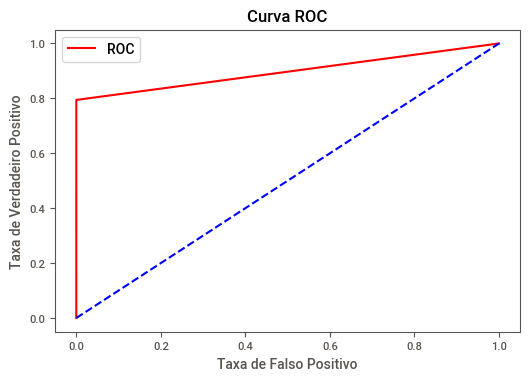

In [32]:
# Fazendo as comparações e exibindo o gráfico da curva
x, y, thresholds = roc_curve(y_teste, pred)
plot_curva_roc(x, y)

## *Criando o segundo melhor modelo*

In [33]:
# Criando o modelo
modelo_rf2 = RandomForestClassifier(n_estimators=150, max_depth = 7)

# Treinando o modelo
modelo_rf2.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=7, n_estimators=150)

**Fazendo as previsões nos dados de teste e criando uma matriz de confusão para avaliar o desempenho do modelo**

In [34]:
# Fazendo as previsões
rf2_pred = modelo_rf2.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,rf2_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        85297    5  85302
1           29  112    141
All      85326  117  85443


**Observando as métricas do modelo**

In [35]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, rf2_pred.round())

acurácia: 1.000
precisão: 0.957
sensibilidade: 0.794
f1-score: 0.868


*Utilizando a Curva ROC para avaliar o desempenho do modelo*

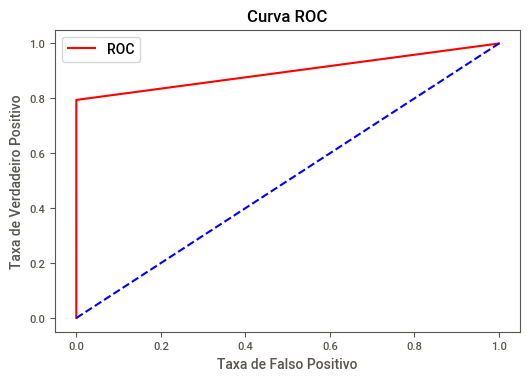

In [36]:
# Fazendo as comparações e exibindo o gráfico da curva
x, y, thresholds = roc_curve(y_teste, rf2_pred)
plot_curva_roc(x, y)

## *Utilizando o Oversampling*

**Pelo fato da variável alvo ser desbalanceada ela acaba comprometendo o desempenho do modelo, sendo assim utilizarei a técnica do oversampling SMOTE que consiste em balancear a classe positiva da variável que nesse caso se chama 'Class'.**

In [37]:
# Fazendo a importação do oversample
from imblearn.over_sampling import SMOTE

# Balanceamento da classe (Class)
oversample = SMOTE()

# Aplicando os registros da classe balanceada
X_over, y_over = oversample.fit_resample(X_treino, y_treino)

**Criando e treinando o modelo com a classe balanceada**

In [38]:
# Criando o modelo
modelo = RandomForestClassifier()

# Treinando o modelo
modelo.fit(X_over, y_over)

RandomForestClassifier()

**Fazendo as previsões nos dados de teste e criando uma matriz de confusão para avaliar o desempenho do modelo**

In [39]:
# Fazendo as predições
y_predito = modelo.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,y_predito, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        85287   15  85302
1           18  123    141
All      85305  138  85443


**Observando as métricas do modelo**

In [40]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, y_predito)

acurácia: 1.000
precisão: 0.891
sensibilidade: 0.872
f1-score: 0.882


*Utilizando a Curva ROC para avaliar o desempenho do modelo*

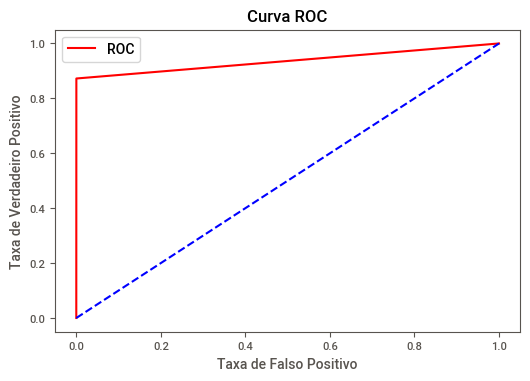

In [41]:
# Observando o gráfico da curva ROC
x, y, thresholds = roc_curve(y_teste, y_predito)
plot_curva_roc(x, y)

**O modelo com os dados balanceados apresentou melhores métricas, sendo assim ele sera o modelo final.**

**Verificando quais foram as variáveis mais importantes para as predições.**

In [42]:
#Analisando a importância de cada variável
modelo.feature_importances_

feature_importances = pd.DataFrame(modelo.feature_importances_, index = X_treino.columns, columns=['Importância']).sort_values('Importância',ascending=False)
feature_importances

Importância
V14        0.126436
V4         0.123174
V10        0.114264
V11        0.110065
V12        0.104575
V17        0.062244
V3         0.053253
V16        0.043811
V7         0.041687
V9         0.030827
V2         0.024756
V8         0.014595
V18        0.012576
V5         0.011800
V6         0.010062
V20        0.010048
Amount     0.009401
V1         0.008996
V13        0.008809
V26        0.008640
V27        0.008562
V23        0.008277
V21        0.008108
V28        0.008080
V19        0.007739
V15        0.007077
Time       0.006140
V24        0.006027
V25        0.005408
V22        0.004563

## *Criando um segundo modelo com a classe já balanceada*

In [43]:
# Criando o modelo
modelo2 = RandomForestClassifier(n_estimators=50, max_depth = 7)

# Treinando o modelo
modelo2.fit(X_over, y_over)

RandomForestClassifier(max_depth=7, n_estimators=50)

**Fazendo as previsões nos dados de teste e criando uma matriz de confusão para avaliar o desempenho do modelo**

In [44]:
# Fazendo as predições
y_predito2 = modelo2.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,y_predito2, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        84979  323  85302
1           14  127    141
All      84993  450  85443


**Observando as métricas do modelo**

In [45]:
# Observando as métricas
metricas(y_teste, y_predito2)

acurácia: 0.996
precisão: 0.282
sensibilidade: 0.901
f1-score: 0.430


*Utilizando a Curva ROC para avaliar o desempenho do modelo*

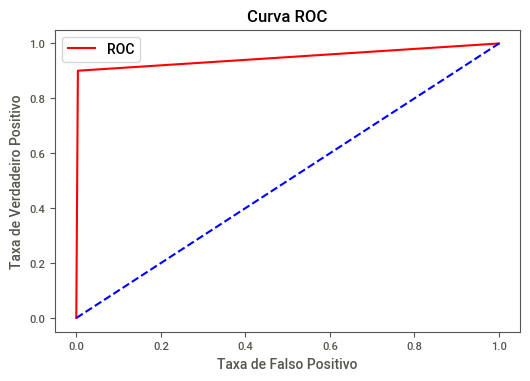

In [46]:
# Observando o gráfico da curva ROC
x, y, thresholds = roc_curve(y_teste, y_predito2)
plot_curva_roc(x, y)

*Esse modelo em específico tem uma peculiaridade interessante, já que foi o modelo que teve a maior taxa de verdadeiros positivos, ou seja, foi o modelo que mais detectou fraudes quando realmente eram fraudes, no entanto, ele também foi o modelo que mais apresentou falsos positivos, que é quando o modelo previu fraude quando na realidade era uma transação normal.*

## *Como o primeiro modelo com classes balanceadas apresentou uma melhor desempenho, ele que sera utilizado para prever as possíveis transações fraudulentas na base de dados.*

In [47]:
# Atribuindo a probabilidade da transação ser fraudulenta
df['Proba'] = modelo.predict_proba(X[X_treino.columns])[:,1]

*Criando um novo DataFrame que vai receber o DF original, porém vai estar em ordem decrescente com base na variável Proba que é a variável que vai indicar se a chance da variável ser ou não uma fraude.*

In [ ]:
# Criando um novo DF ordenado em ordem decrescente 
df_ordenado = df.sort_values(by='Proba', ascending = False)

*Criando um top 50 das transações com maiores chances de ser fraudes.*

In [50]:
# Exibindo as 50 transações com maiores chances de ser fraudes
df_ordenado.head(50)

Time         V1         V2         V3        V4         V5  \
100623 -0.573678  -0.758469  -0.045410  -0.168438 -1.313275  -1.901763   
30442  -1.240056  -3.896583   4.518355  -4.454027  5.547453  -4.121459   
42473  -1.130765  -3.600544   4.519047  -6.340884  6.214767  -5.829558   
6427   -1.836332   0.725646   2.300894  -5.329976  4.007683  -1.730411   
57470  -0.987424   0.364377   1.443523  -2.220907  2.036985  -1.237055   
30314  -1.241320  -2.044489   3.368306  -3.937111  5.623120  -3.079232   
99506  -0.582543  -1.824295   0.403327  -1.994122  2.756558  -3.139064   
141257 -0.223422  -0.937843   3.462889  -6.445104  4.932199  -2.233983   
141258 -0.223422  -0.937843   3.462889  -6.445104  4.932199  -2.233983   
17480  -1.391062 -30.552380  16.713389 -31.103685  6.534984 -22.105532   
141259 -0.223422  -1.927453   1.827621  -7.019495  5.348303  -2.739188   
218442  0.979323  -6.352337  -2.370335  -4.875397  2.335045  -0.809555   
111690 -0.473527  -4.198735   0.194121  -3.917586  3.920748  -1.875486   
41395  -1.140326  -4.446847  -0.014793  -5.126307  6.945130   5.269255   
141260 -0.223422  -1.927453   1.827621  -7.019495  5.348303  -2.739188   
145800 -0.160290  -0.419820  -1.155978  -2.092516  2.786750   0.736297   
263877  1.396986  -3.387601   3.977881  -6.978585  1.657766  -1.100500   
15166  -1.438064 -18.474868  11.586381 -21.402917  6.038515 -14.451158   
44270  -1.114888 -20.906908   9.843153 -19.947726  6.155789 -15.142013   
15476  -1.430904 -21.209120  12.652197 -23.553933  6.174078 -16.026658   
6446   -1.835027   0.702710   2.426433  -5.234513  4.416661  -2.170806   
42856  -1.127459 -11.682215   6.332882 -13.297109  7.690772 -10.889891   
106998 -0.517706   0.315642   1.636778  -1.519650  4.028571  -1.186794   
92777  -0.646918  -6.133987   2.941499  -5.593986  3.258845  -5.315512   
120085 -0.402372  -4.261226   2.809298  -3.698694  3.802798  -3.573280   
52521  -1.038426   1.001992   0.047938  -0.349002  1.493958   0.186939   
128479 -0.338798  -4.312479   1.886476  -2.338634 -0.475243  -1.185444   
64329  -0.920270  -9.848776   7.365546 -12.898538  4.273323  -7.611991   
83053  -0.740078   0.326007   1.286638  -2.007181  2.419675  -1.532902   
76609  -0.803652  -8.762083   2.791030  -7.682767  6.991214  -5.230695   
212516  0.928236  -1.298443   1.948100  -4.509947  1.305805  -0.019486   
108708 -0.500776  -3.170818   0.185735  -3.399852  3.761155  -2.148047   
167184  0.499455  -5.961457   5.313382  -6.674320  6.028975  -1.387560   
147548 -0.129335  -3.859881   2.632881  -5.264265  3.446113  -0.675231   
17366  -1.393105 -28.524268  15.876923 -29.468732  6.447591 -20.786000   
44223  -1.115288 -19.139733   9.286847 -20.134992  7.818673 -15.652208   
223572  1.023839  -2.729482   3.312495  -4.242710  5.036985  -0.376561   
262560  1.383993   0.567539   3.309385  -6.631268  6.394574  -0.054172   
15810  -1.422712 -25.942434  14.601998 -27.368650  6.378395 -19.104033   
30398  -1.240477  -3.519030   4.140867  -3.628202  5.505672  -4.057463   
27627  -1.267263   0.333499   1.699873  -2.596561  3.643945  -0.585068   
150687 -0.019307 -10.300820   6.483095 -15.076363  6.554191  -8.880252   
243848  1.206285  -4.124316   3.748597  -7.926507  7.763242  -0.769375   
15225  -1.436758 -19.856322  12.095893 -22.464083  6.115541 -15.148022   
52466  -1.039227  -1.476893   2.122314  -1.229470  1.201849  -0.343264   
214662  0.946620   0.467992   1.100118  -5.607145  2.204714  -0.578539   
30384  -1.240625  -2.857170   4.045601  -4.197299  5.487199  -3.070776   
80760  -0.761704  -0.451383   2.225147  -4.953050  4.342228  -3.656190   
42887  -1.127207 -12.835760   6.574615 -12.788462  8.786257 -10.723121   
14197  -1.465271 -16.598665  10.541751 -19.818982  6.017295 -13.025901   

              V6         V7         V8        V9        V10       V11  \
100623  0.739433   3.071892  -0.483422  0.618203  -1.769060 -0.651414   
30442  -1.163407  -6.805053   2.928356 -4.917130  -6.600461  3.367846   
42473  -2.478095  

**Conclusão**

* O melhor modelo foi um RandomForestClassifier com um Oversampling.

* A variável mais importantes foi a 'V14', seguido pela 'V14' e 'V10'.

* Agora que já temos como identificar com certeza cerca de 85% das transações fraudulentas, medidas preventivas podem ser tomadas para mitigar esse tipo de problema.